In [1]:
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler

# Load CSVs (features x samples format, so we need to transpose)
gene_df = pd.read_csv("../NewDatasets/processed_expression_FXS_OG.csv", index_col=0).T
meth_df = pd.read_csv("../NewDatasets/processed_methylation_FXS_OG.csv", index_col=0).T
cnv_df  = pd.read_csv("../NewDatasets/processed_cnv_FXS_OG.csv", index_col=0).T


# Apply standard scaling to all data
scaler_meth = StandardScaler()
meth_df = pd.DataFrame(
    scaler_meth.fit_transform(meth_df.T).T,
    index=meth_df.index,
    columns=meth_df.columns
)

scaler_cnv = StandardScaler()
cnv_df = pd.DataFrame(
    scaler_cnv.fit_transform(cnv_df.T).T,
    index=cnv_df.index,
    columns=cnv_df.columns
)

scaler_gene = StandardScaler()
gene_df = pd.DataFrame(
    scaler_gene.fit_transform(gene_df.T).T,
    index=gene_df.index,
    columns=gene_df.columns
)

print("After transpose - Shapes (samples x features):")
print(f"gene_df: {gene_df.shape}")
print(f"meth_df: {meth_df.shape}")
print(f"cnv_df: {cnv_df.shape}")

After transpose - Shapes (samples x features):
gene_df: (205, 44663)
meth_df: (205, 419542)
cnv_df: (205, 56756)


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
print("NaN counts:", gene_df.isna().sum().sum(),
      meth_df.isna().sum().sum(),
      cnv_df.isna().sum().sum())


NaN counts: 0 0 0


In [4]:
gene_df = gene_df.fillna(0.0)
meth_df = meth_df.fillna(0.0)
cnv_df  = cnv_df.fillna(0.0)


In [5]:
print("Shapes:", gene_df.shape, meth_df.shape, cnv_df.shape)
# Align samples across all three omics
common = gene_df.index.intersection(meth_df.index).intersection(cnv_df.index)
gene_df = gene_df.loc[common]
meth_df = meth_df.loc[common]
cnv_df  = cnv_df.loc[common]

print("Shapes:", gene_df.shape, meth_df.shape, cnv_df.shape)
# Convert to float32 tensors
gene = torch.tensor(gene_df.values, dtype=torch.float32).to(device)
meth = torch.tensor(meth_df.values, dtype=torch.float32).to(device)
cnv  = torch.tensor(cnv_df.values, dtype=torch.float32).to(device)


Shapes: (205, 44663) (205, 419542) (205, 56756)
Shapes: (205, 44663) (205, 419542) (205, 56756)
Shapes: (205, 44663) (205, 419542) (205, 56756)


Epoch 1/400 | Train Loss: 1.0178 | Val Loss: 1.1029
Epoch 10/400 | Train Loss: 0.9786 | Val Loss: 0.9819
Epoch 20/400 | Train Loss: 0.8914 | Val Loss: 0.9124
Epoch 10/400 | Train Loss: 0.9786 | Val Loss: 0.9819
Epoch 20/400 | Train Loss: 0.8914 | Val Loss: 0.9124
Epoch 30/400 | Train Loss: 0.8334 | Val Loss: 0.8664
Epoch 40/400 | Train Loss: 0.7883 | Val Loss: 0.8430
Epoch 30/400 | Train Loss: 0.8334 | Val Loss: 0.8664
Epoch 40/400 | Train Loss: 0.7883 | Val Loss: 0.8430
Epoch 50/400 | Train Loss: 0.7476 | Val Loss: 0.8238
Epoch 60/400 | Train Loss: 0.7084 | Val Loss: 0.8097
Epoch 50/400 | Train Loss: 0.7476 | Val Loss: 0.8238
Epoch 60/400 | Train Loss: 0.7084 | Val Loss: 0.8097
Epoch 70/400 | Train Loss: 0.6777 | Val Loss: 0.8007
Epoch 80/400 | Train Loss: 0.6519 | Val Loss: 0.7973
Epoch 70/400 | Train Loss: 0.6777 | Val Loss: 0.8007
Epoch 80/400 | Train Loss: 0.6519 | Val Loss: 0.7973
Epoch 90/400 | Train Loss: 0.6223 | Val Loss: 0.7934
Epoch 100/400 | Train Loss: 0.5982 | Val Loss: 

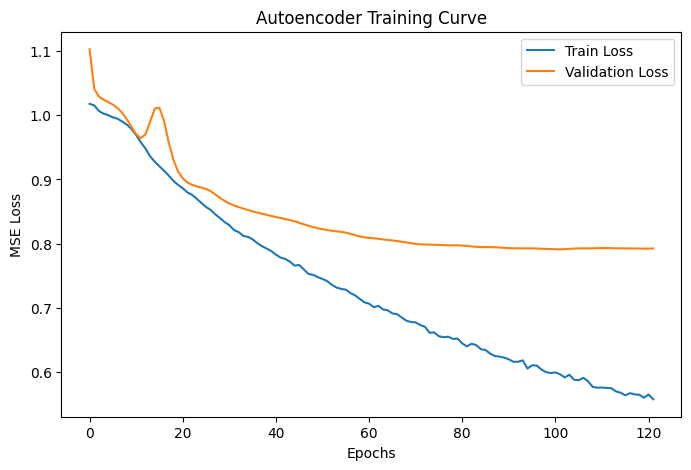

Epoch 1/400 | Train Loss: 1.0411 | Val Loss: 6.4943
Epoch 10/400 | Train Loss: 1.0196 | Val Loss: 0.9253
Epoch 10/400 | Train Loss: 1.0196 | Val Loss: 0.9253
Epoch 20/400 | Train Loss: 0.9714 | Val Loss: 0.8783
Epoch 20/400 | Train Loss: 0.9714 | Val Loss: 0.8783
Epoch 30/400 | Train Loss: 0.8813 | Val Loss: 0.8506
Epoch 30/400 | Train Loss: 0.8813 | Val Loss: 0.8506
Epoch 40/400 | Train Loss: 0.8273 | Val Loss: 0.7998
Epoch 40/400 | Train Loss: 0.8273 | Val Loss: 0.7998
Epoch 50/400 | Train Loss: 0.7863 | Val Loss: 0.7742
Epoch 50/400 | Train Loss: 0.7863 | Val Loss: 0.7742
Epoch 60/400 | Train Loss: 0.7510 | Val Loss: 0.7583
Epoch 60/400 | Train Loss: 0.7510 | Val Loss: 0.7583
Epoch 70/400 | Train Loss: 0.7287 | Val Loss: 0.7534
Epoch 70/400 | Train Loss: 0.7287 | Val Loss: 0.7534
Epoch 80/400 | Train Loss: 0.7065 | Val Loss: 0.7408
Epoch 80/400 | Train Loss: 0.7065 | Val Loss: 0.7408
Epoch 90/400 | Train Loss: 0.6765 | Val Loss: 0.7272
Epoch 90/400 | Train Loss: 0.6765 | Val Loss: 0

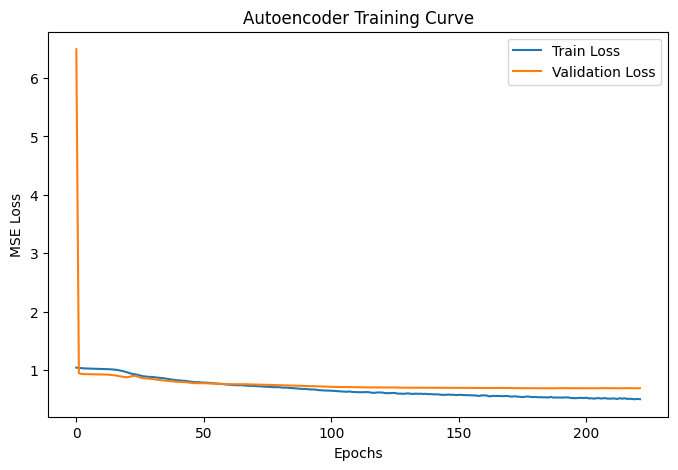

Epoch 1/400 | Train Loss: 1.0127 | Val Loss: 1.1155
Epoch 10/400 | Train Loss: 0.9908 | Val Loss: 1.0291
Epoch 20/400 | Train Loss: 0.9288 | Val Loss: 0.9865
Epoch 30/400 | Train Loss: 0.8102 | Val Loss: 0.9028
Epoch 20/400 | Train Loss: 0.9288 | Val Loss: 0.9865
Epoch 30/400 | Train Loss: 0.8102 | Val Loss: 0.9028
Epoch 40/400 | Train Loss: 0.7367 | Val Loss: 0.8708
Epoch 50/400 | Train Loss: 0.6760 | Val Loss: 0.8474
Epoch 40/400 | Train Loss: 0.7367 | Val Loss: 0.8708
Epoch 50/400 | Train Loss: 0.6760 | Val Loss: 0.8474
Epoch 60/400 | Train Loss: 0.6281 | Val Loss: 0.8256
Epoch 70/400 | Train Loss: 0.5803 | Val Loss: 0.8087
Epoch 60/400 | Train Loss: 0.6281 | Val Loss: 0.8256
Epoch 70/400 | Train Loss: 0.5803 | Val Loss: 0.8087
Epoch 80/400 | Train Loss: 0.5382 | Val Loss: 0.7965
Epoch 90/400 | Train Loss: 0.5151 | Val Loss: 0.7848
Epoch 80/400 | Train Loss: 0.5382 | Val Loss: 0.7965
Epoch 90/400 | Train Loss: 0.5151 | Val Loss: 0.7848
Epoch 100/400 | Train Loss: 0.4803 | Val Loss: 

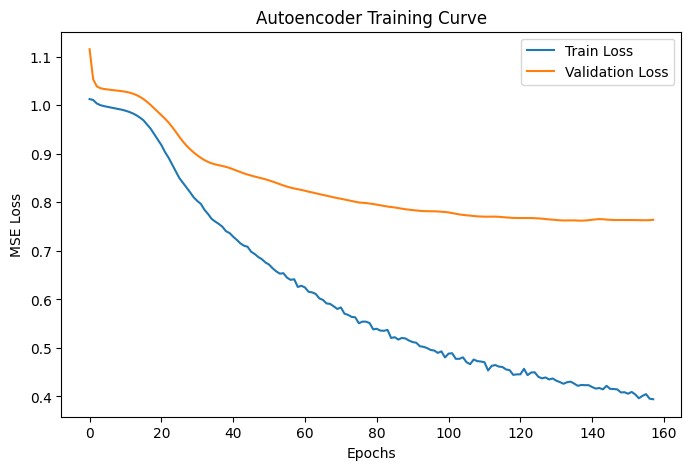

Individual latent shapes:
  - Gene latent: torch.Size([205, 64])
  - Methylation latent: torch.Size([205, 64])
  - CNV latent: torch.Size([205, 64])


In [6]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

# ------------------ Autoencoder with Dropout ------------------
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=64, dropout=0.3):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return z, x_recon

# ------------------ Training with validation & early stopping ------------------
def train_autoencoder(model, data, epochs=400, patience=20, normalize=True):
    # Optionally normalize features to mean=0, std=1
    if normalize:
        scaler = StandardScaler()
        data_np = scaler.fit_transform(data.cpu().numpy())
    else:
        data_np = data.cpu().numpy()

    # Split into train/val
    X_train, X_val = train_test_split(data_np, test_size=0.2, random_state=42)
    X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
    X_val   = torch.tensor(X_val, dtype=torch.float32).to(device)

    optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)  # L2 reg
    criterion = nn.MSELoss()

    train_losses, val_losses = [], []
    best_val_loss = np.inf
    best_model_state = None
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        z, recon = model(X_train)
        loss = criterion(recon, X_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            _, val_recon = model(X_val)
            val_loss = criterion(val_recon, X_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

        # Early stopping
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break

    # Restore best model
    if best_model_state:
        model.load_state_dict(best_model_state)

    # Plot loss curves
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Autoencoder Training Curve")
    plt.legend()
    plt.show()

    return model

# ------------------ Train per omic ------------------
gene_dim, meth_dim, cnv_dim = gene.shape[1], meth.shape[1], cnv.shape[1]

ae_gene = Autoencoder(gene_dim, latent_dim=64).to(device)
ae_meth = Autoencoder(meth_dim, latent_dim=64).to(device)
ae_cnv  = Autoencoder(cnv_dim,  latent_dim=64).to(device)

ae_gene = train_autoencoder(ae_gene, gene, normalize=True)
ae_meth = train_autoencoder(ae_meth, meth, normalize=True)
ae_cnv  = train_autoencoder(ae_cnv, cnv, normalize=True)

# ------------------ Extract latent embeddings (NO FUSION) ------------------
ae_gene.eval(); ae_meth.eval(); ae_cnv.eval()
with torch.no_grad():
    z_gene, _ = ae_gene(gene.to(device))
    z_meth, _ = ae_meth(meth.to(device))
    z_cnv,  _ = ae_cnv(cnv.to(device))

print("Individual latent shapes:")
print(f"  - Gene latent: {z_gene.shape}")
print(f"  - Methylation latent: {z_meth.shape}")
print(f"  - CNV latent: {z_cnv.shape}")


# Individual Omics Machine Learning Evaluation

Train multiple classifiers on each individual omic's latent embeddings separately and compare performance.

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)
import seaborn as sns

# Load subtype labels
labels_df = pd.read_csv("../NewDatasets/processed_labels_3Omics_FXS_OG.csv", index_col=0)

# Align labels with our data
common_samples = gene_df.index.intersection(labels_df.index)
print(f"Samples with labels: {len(common_samples)}")

# Get labels
labels = labels_df.loc[common_samples].values.ravel()

print(f"Labels shape: {labels.shape}")
print(f"Unique classes: {np.unique(labels)}")
print(f"Class distribution: {np.bincount(labels.astype(int))}")

# Prepare individual omics embeddings
omics_data = {
    'Gene Expression': z_gene.cpu().numpy(),
    'Methylation': z_meth.cpu().numpy(),
    'Copy Number Variation': z_cnv.cpu().numpy()
}

print("\nIndividual omics embedding shapes:")
for name, data in omics_data.items():
    print(f"  {name}: {data.shape}")

Samples with labels: 205
Labels shape: (205,)
Unique classes: [0 1 2 3]
Class distribution: [53 22 96 34]

Individual omics embedding shapes:
  Gene Expression: (205, 64)
  Methylation: (205, 64)
  Copy Number Variation: (205, 64)


# Individual Omics Autoencoder Analysis

Analyzing the extracted embeddings from individual omics autoencoders.

In [13]:
# C-index calculation function (same as AE pipeline)
from sklearn.metrics import roc_auc_score

def concordance_index(y_true, y_pred_proba):
    """
    Calculate C-index (Concordance Index) for multi-class classification.
    Uses macro-averaged AUC for multi-class problems.
    """
    try:
        # For multi-class, use macro-averaged AUC as C-index
        c_index = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='macro')
        return c_index
    except:
        return 0.0

print("="*100)
print("INDIVIDUAL OMICS AUTOENCODER EMBEDDINGS ANALYSIS")
print("="*100)

# Display embedding statistics
for omic_name, omic_data in omics_data.items():
    print(f"\n{omic_name} Embeddings:")
    print(f"  Shape: {omic_data.shape}")
    print(f"  Mean: {omic_data.mean():.4f}")
    print(f"  Std: {omic_data.std():.4f}")
    print(f"  Min: {omic_data.min():.4f}")
    print(f"  Max: {omic_data.max():.4f}")

print("\n✅ Autoencoder embeddings analysis completed!")

INDIVIDUAL OMICS AUTOENCODER EMBEDDINGS ANALYSIS

Gene Expression Embeddings:
  Shape: (205, 64)
  Mean: -0.0424
  Std: 0.7556
  Min: -2.8229
  Max: 2.9573

Methylation Embeddings:
  Shape: (205, 64)
  Mean: 0.0323
  Std: 1.9396
  Min: -6.1749
  Max: 7.2662

Copy Number Variation Embeddings:
  Shape: (205, 64)
  Mean: -0.2178
  Std: 1.6124
  Min: -6.6890
  Max: 5.3034

✅ Autoencoder embeddings analysis completed!


COMPREHENSIVE INDIVIDUAL OMICS EMBEDDINGS VISUALIZATION

📊 Processing Gene Expression...
Computing PCA for Gene Expression...
Computing t-SNE for Gene Expression...


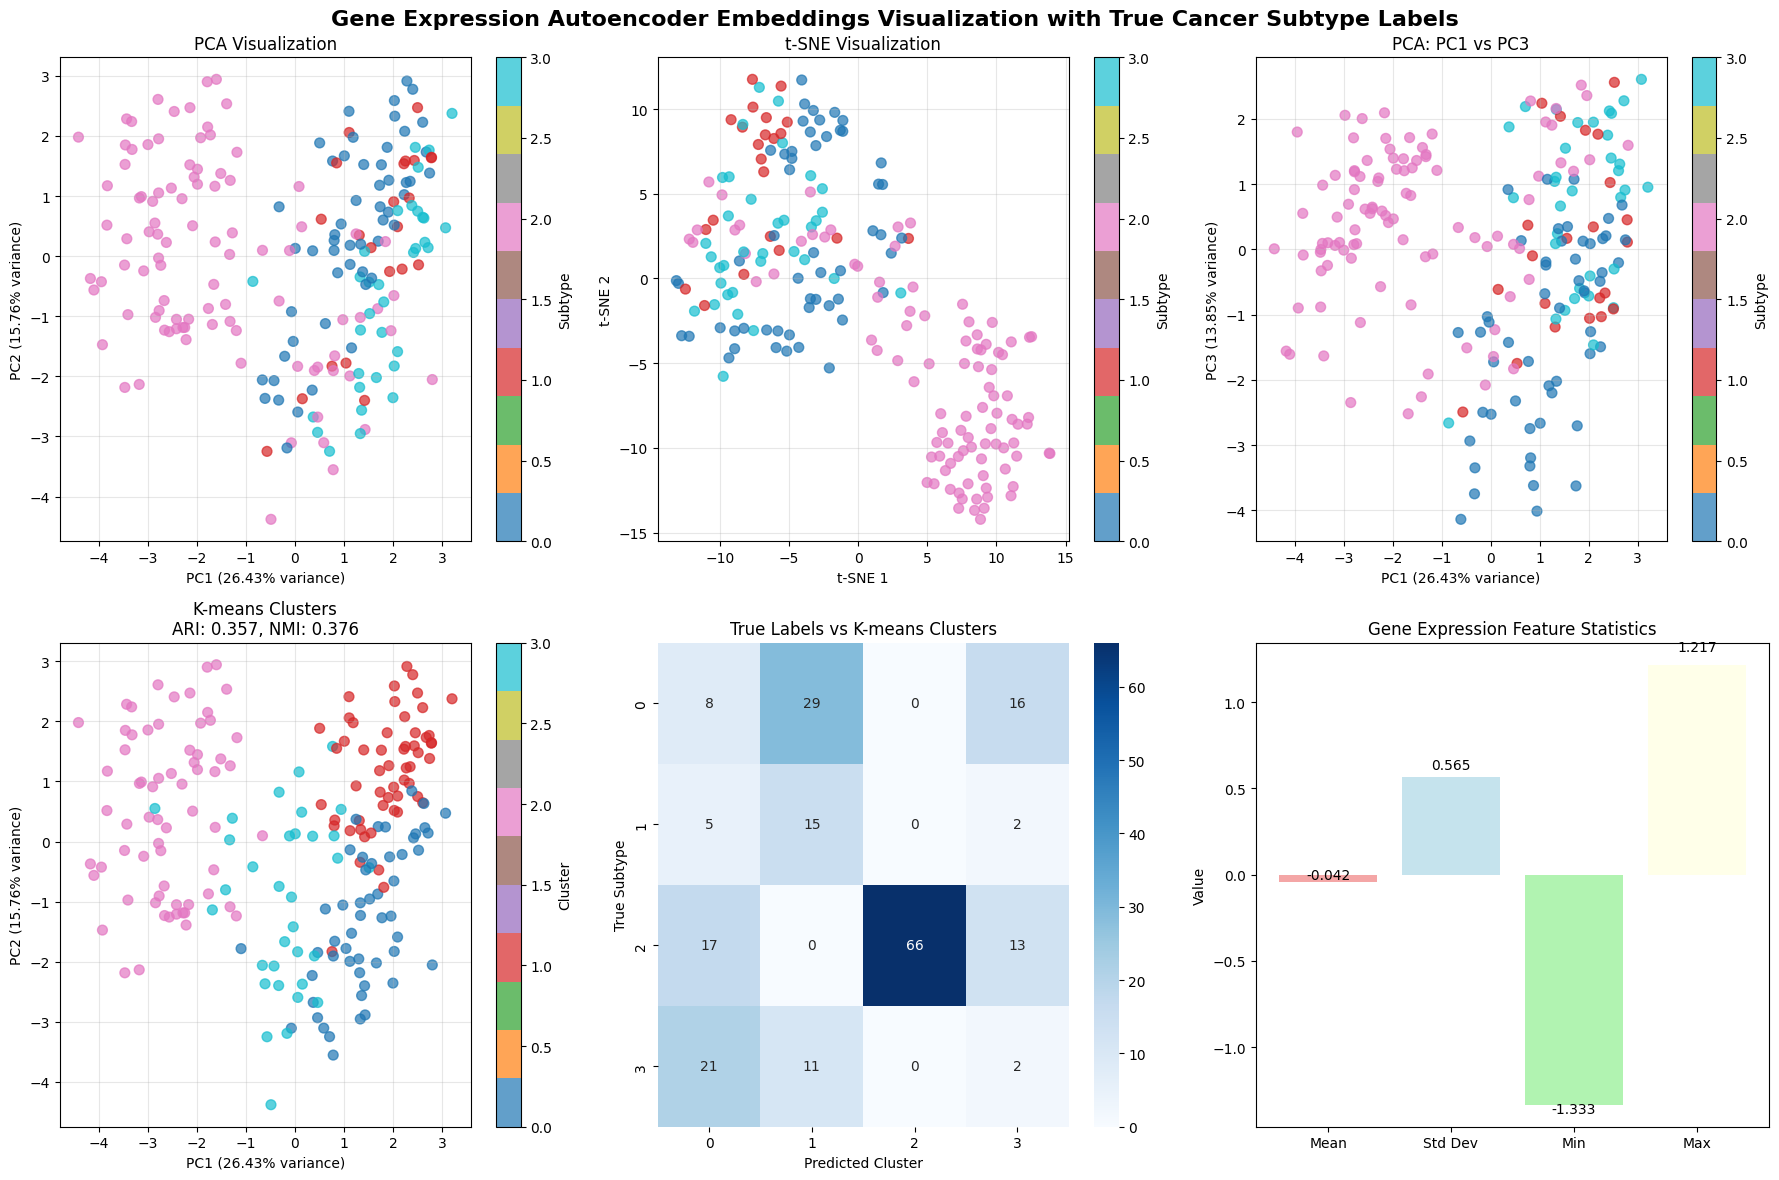


📊 Processing Methylation...
Computing PCA for Methylation...
Computing t-SNE for Methylation...


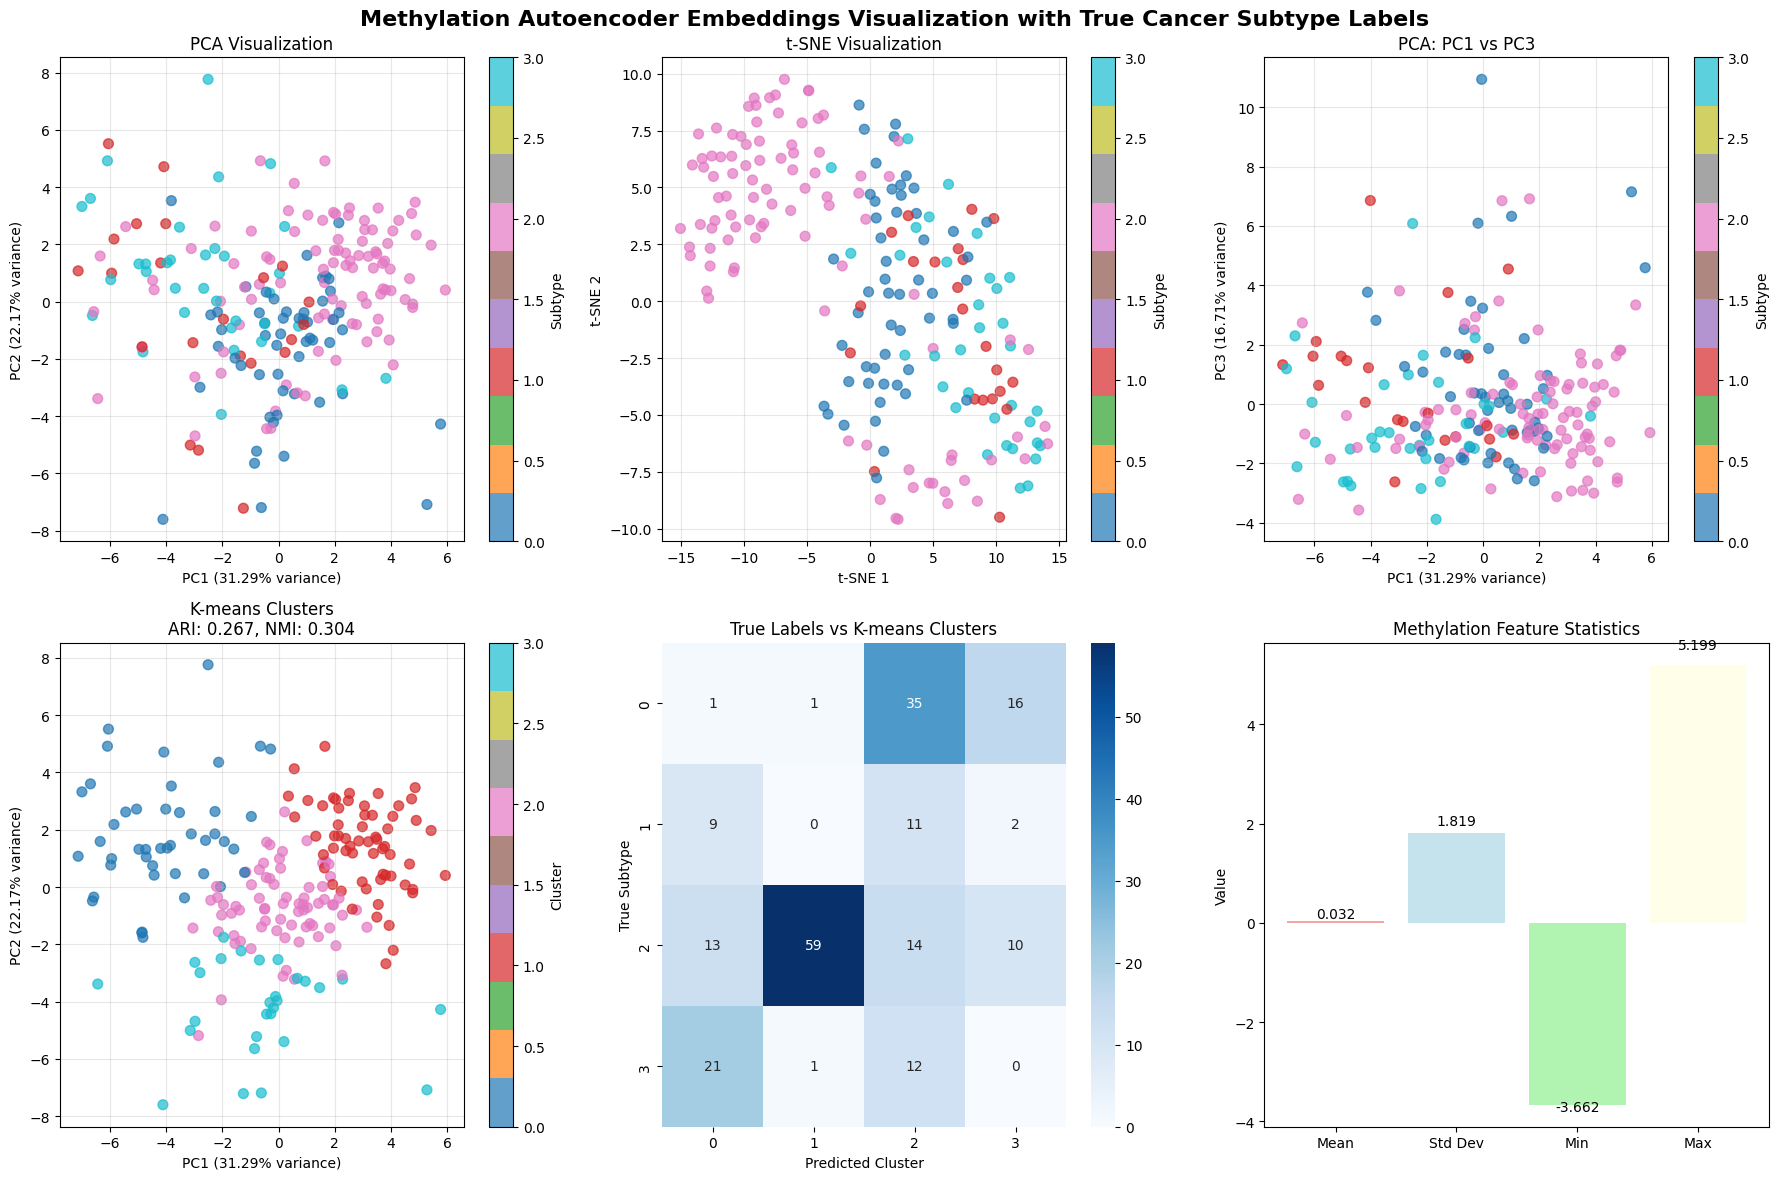


📊 Processing Copy Number Variation...
Computing PCA for Copy Number Variation...
Computing t-SNE for Copy Number Variation...


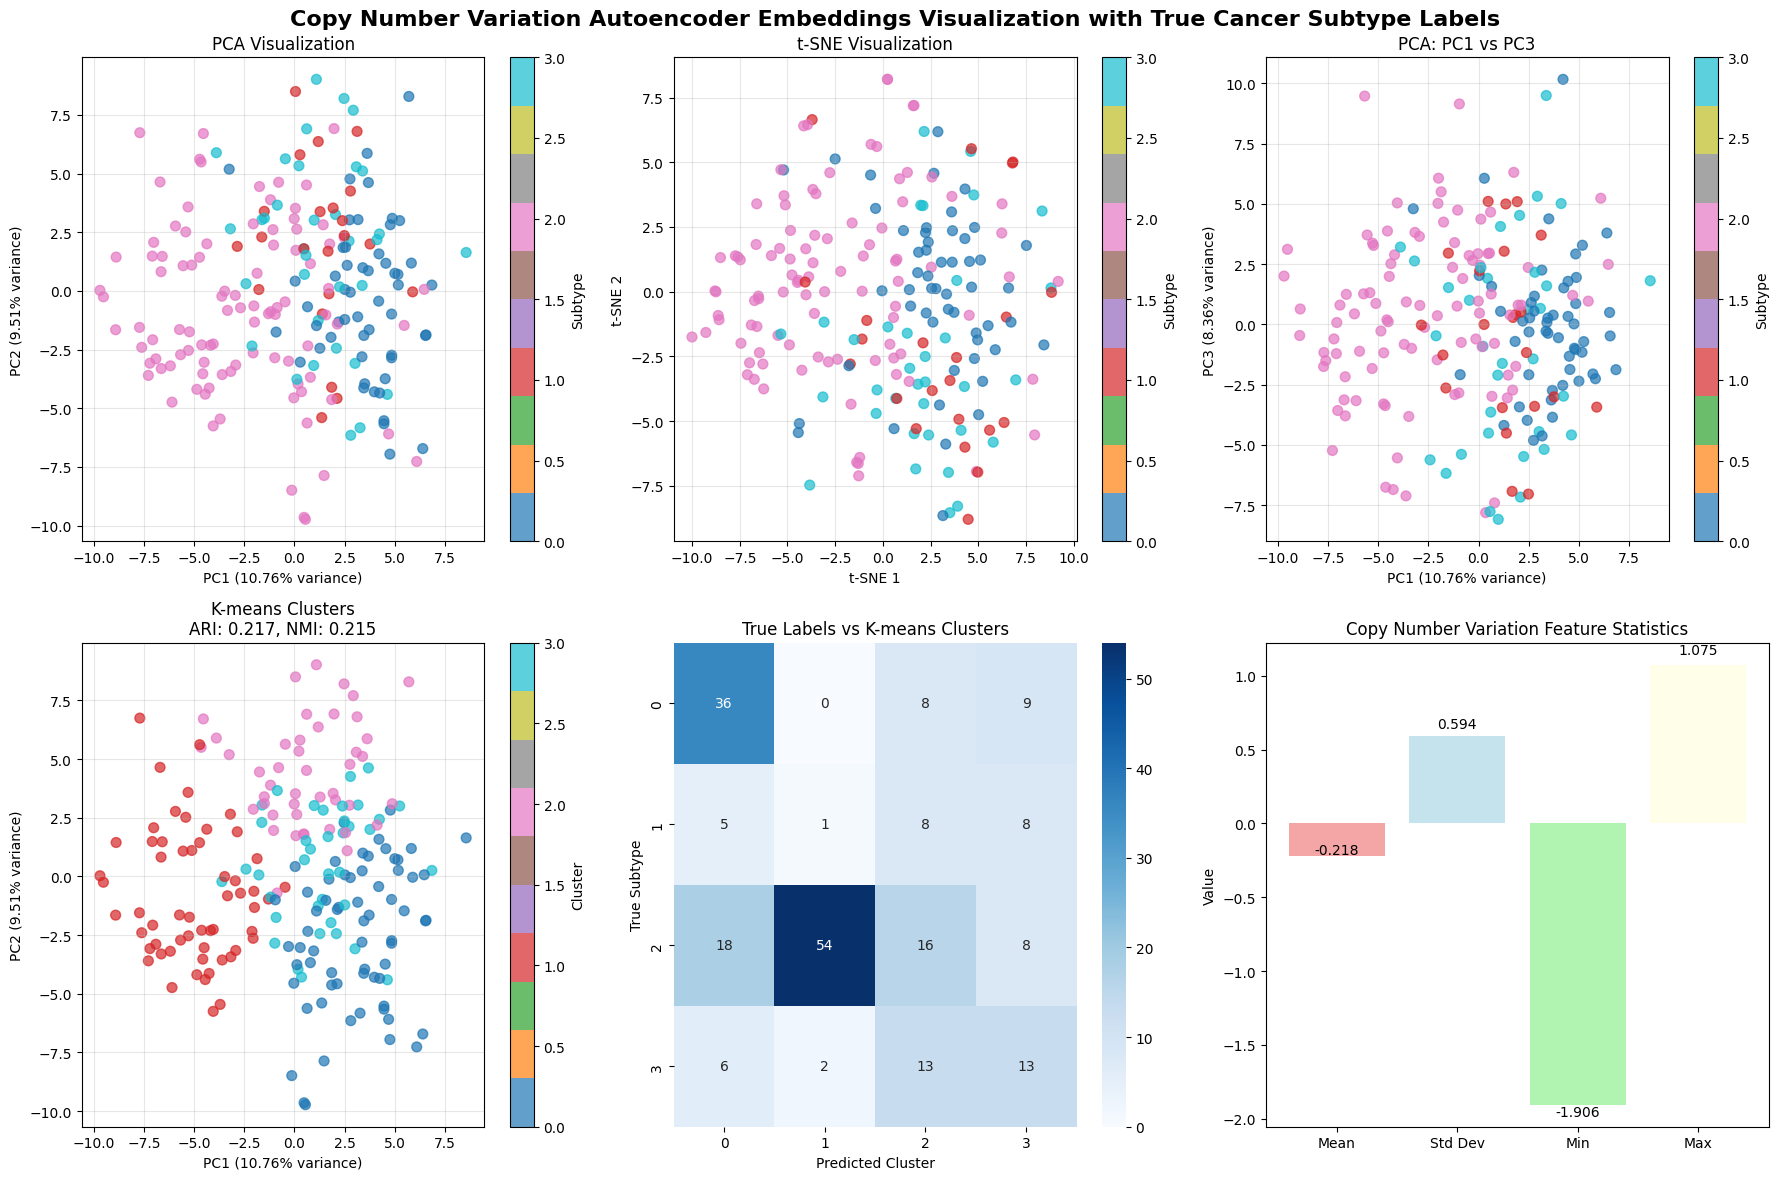

✅ Comprehensive individual omics embeddings visualization completed!


In [14]:
# Comprehensive Embedding Visualization for Each Omic (same as AE pipeline)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("="*100)
print("COMPREHENSIVE INDIVIDUAL OMICS EMBEDDINGS VISUALIZATION")
print("="*100)

# Process each omic separately with comprehensive visualization
for omic_name, omic_data in omics_data.items():
    print(f"\n📊 Processing {omic_name}...")
    
    # Create comprehensive visualization for this omic
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'{omic_name} Autoencoder Embeddings Visualization with True Cancer Subtype Labels', fontsize=16, fontweight='bold')

    # 1. PCA 2D visualization
    print(f"Computing PCA for {omic_name}...")
    pca_2d = PCA(n_components=2, random_state=42)
    embeddings_pca_2d = pca_2d.fit_transform(omic_data)

    scatter1 = axes[0, 0].scatter(embeddings_pca_2d[:, 0], embeddings_pca_2d[:, 1], 
                                 c=labels, cmap='tab10', alpha=0.7, s=50)
    axes[0, 0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
    axes[0, 0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
    axes[0, 0].set_title('PCA Visualization')
    axes[0, 0].grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=axes[0, 0], label='Subtype')

    # 2. t-SNE 2D visualization
    print(f"Computing t-SNE for {omic_name}...")
    tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
    embeddings_tsne_2d = tsne_2d.fit_transform(omic_data)

    scatter2 = axes[0, 1].scatter(embeddings_tsne_2d[:, 0], embeddings_tsne_2d[:, 1], 
                                 c=labels, cmap='tab10', alpha=0.7, s=50)
    axes[0, 1].set_xlabel('t-SNE 1')
    axes[0, 1].set_ylabel('t-SNE 2')
    axes[0, 1].set_title('t-SNE Visualization')
    axes[0, 1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[0, 1], label='Subtype')

    # 3. PCA 3D to 2D projections (PC1 vs PC3)
    pca_3d = PCA(n_components=3, random_state=42)
    embeddings_pca_3d = pca_3d.fit_transform(omic_data)

    scatter3 = axes[0, 2].scatter(embeddings_pca_3d[:, 0], embeddings_pca_3d[:, 2], 
                                 c=labels, cmap='tab10', alpha=0.7, s=50)
    axes[0, 2].set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
    axes[0, 2].set_ylabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
    axes[0, 2].set_title('PCA: PC1 vs PC3')
    axes[0, 2].grid(True, alpha=0.3)
    plt.colorbar(scatter3, ax=axes[0, 2], label='Subtype')

    # 4. Cluster analysis comparison
    n_clusters = len(np.unique(labels))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    predicted_clusters = kmeans.fit_predict(omic_data)

    # Calculate clustering metrics
    ari_score = adjusted_rand_score(labels, predicted_clusters)
    nmi_score = normalized_mutual_info_score(labels, predicted_clusters)

    scatter4 = axes[1, 0].scatter(embeddings_pca_2d[:, 0], embeddings_pca_2d[:, 1], 
                                 c=predicted_clusters, cmap='tab10', alpha=0.7, s=50)
    axes[1, 0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
    axes[1, 0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
    axes[1, 0].set_title(f'K-means Clusters\nARI: {ari_score:.3f}, NMI: {nmi_score:.3f}')
    axes[1, 0].grid(True, alpha=0.3)
    plt.colorbar(scatter4, ax=axes[1, 0], label='Cluster')

    # 5. Confusion matrix: True vs Predicted
    cm = confusion_matrix(labels, predicted_clusters)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
    axes[1, 1].set_xlabel('Predicted Cluster')
    axes[1, 1].set_ylabel('True Subtype')
    axes[1, 1].set_title('True Labels vs K-means Clusters')

    # 6. Feature statistics
    feature_stats = {
        'Mean': np.mean(omic_data, axis=0).mean(),
        'Std Dev': np.mean(omic_data, axis=0).std(),
        'Min': np.mean(omic_data, axis=0).min(),
        'Max': np.mean(omic_data, axis=0).max()
    }
    
    bars = axes[1, 2].bar(feature_stats.keys(), feature_stats.values(), 
                          alpha=0.7, color=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
    axes[1, 2].set_ylabel('Value')
    axes[1, 2].set_title(f'{omic_name} Feature Statistics')
    
    # Add value labels on bars
    for bar, (key, val) in zip(bars, feature_stats.items()):
        axes[1, 2].text(bar.get_x() + bar.get_width()/2., bar.get_height() + bar.get_height()*0.05,
                        f'{val:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

print("✅ Comprehensive individual omics embeddings visualization completed!")

In [17]:
# Traditional ML Classification for Each Omic Separately (same as AE pipeline)
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix)

print("\n" + "="*100)
print("📊 TRADITIONAL ML CLASSIFICATION ON INDIVIDUAL OMICS")
print("="*100)

# Define classifiers (removed KNN, Decision Tree, and SVM Linear as requested)
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    'Naive Bayes': GaussianNB()
}

# Store results for each omic separately
omic_results = {}

# Process each omic separately
for omic_name, omic_data in omics_data.items():
    print(f"\n{'='*100}")
    print(f"🧬 PROCESSING: {omic_name}")
    print(f"{'='*100}")
    
    # Split data for this omic
    X_train, X_test, y_train, y_test = train_test_split(
        omic_data, labels, test_size=0.2, random_state=42, stratify=labels
    )
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"Training class distribution: {np.bincount(y_train.astype(int))}")
    print(f"Test class distribution: {np.bincount(y_test.astype(int))}")
    
    # Store results for this omic
    results = []
    
    print(f"\nTraining and evaluating classifiers for {omic_name}...")
    print("-" * 80)
    
    for name, clf in classifiers.items():
        # Train the model
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
        precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
        recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
        recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
        f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=0)
        c_index = concordance_index(y_test, y_pred_proba)
        
        # Store results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision (Macro)': precision_macro,
            'Precision (Micro)': precision_micro,
            'Recall (Macro)': recall_macro,
            'Recall (Micro)': recall_micro,
            'F1 (Macro)': f1_macro,
            'F1 (Micro)': f1_micro,
            'C-Index': c_index
        })
        
        print(f"{name:20} | Accuracy: {accuracy:.4f} | F1-Macro: {f1_macro:.4f} | C-Index: {c_index:.4f}")
    
    # Store all results for this omic
    omic_results[omic_name] = {
        'results': results,
        'classifiers': classifiers.copy(),
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
    
    print(f"\n✅ {omic_name} traditional ML classification completed!")

print(f"\n{'='*100}")
print("✅ All traditional ML classifications completed!")
print(f"{'='*100}")


📊 TRADITIONAL ML CLASSIFICATION ON INDIVIDUAL OMICS

🧬 PROCESSING: Gene Expression
Training set size: 164
Test set size: 41
Training class distribution: [42 18 77 27]
Test class distribution: [11  4 19  7]

Training and evaluating classifiers for Gene Expression...
--------------------------------------------------------------------------------
Random Forest        | Accuracy: 0.8537 | F1-Macro: 0.8310 | C-Index: 0.9644
Gradient Boosting    | Accuracy: 0.8049 | F1-Macro: 0.7775 | C-Index: 0.9359
SVM (RBF)            | Accuracy: 0.8537 | F1-Macro: 0.8202 | C-Index: 0.9528
Logistic Regression  | Accuracy: 0.8780 | F1-Macro: 0.8428 | C-Index: 0.9638
Naive Bayes          | Accuracy: 0.8537 | F1-Macro: 0.8236 | C-Index: 0.9544

✅ Gene Expression traditional ML classification completed!

🧬 PROCESSING: Methylation
Training set size: 164
Test set size: 41
Training class distribution: [42 18 77 27]
Test class distribution: [11  4 19  7]

Training and evaluating classifiers for Methylation...
-

f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Gradient Boosting    | Accuracy: 0.7073 | F1-Macro: 0.6248 | C-Index: 0.8382
SVM (RBF)            | Accuracy: 0.7317 | F1-Macro: 0.5370 | C-Index: 0.8786
Logistic Regression  | Accuracy: 0.7805 | F1-Macro: 0.7091 | C-Index: 0.8810
Naive Bayes          | Accuracy: 0.7073 | F1-Macro: 0.6349 | C-Index: 0.8409

✅ Methylation traditional ML classification completed!

🧬 PROCESSING: Copy Number Variation
Training set size: 164
Test set size: 41
Training class distribution: [42 18 77 27]
Test class distribution: [11  4 19  7]

Training and evaluating classifiers for Copy Number Variation...
--------------------------------------------------------------------------------


f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest        | Accuracy: 0.6341 | F1-Macro: 0.3690 | C-Index: 0.8219
Gradient Boosting    | Accuracy: 0.5610 | F1-Macro: 0.3805 | C-Index: 0.6360
SVM (RBF)            | Accuracy: 0.7561 | F1-Macro: 0.5490 | C-Index: 0.8733
Logistic Regression  | Accuracy: 0.7805 | F1-Macro: 0.5792 | C-Index: 0.8299
Naive Bayes          | Accuracy: 0.6098 | F1-Macro: 0.4739 | C-Index: 0.7806

✅ Copy Number Variation traditional ML classification completed!

✅ All traditional ML classifications completed!
Gradient Boosting    | Accuracy: 0.5610 | F1-Macro: 0.3805 | C-Index: 0.6360
SVM (RBF)            | Accuracy: 0.7561 | F1-Macro: 0.5490 | C-Index: 0.8733
Logistic Regression  | Accuracy: 0.7805 | F1-Macro: 0.5792 | C-Index: 0.8299
Naive Bayes          | Accuracy: 0.6098 | F1-Macro: 0.4739 | C-Index: 0.7806

✅ Copy Number Variation traditional ML classification completed!

✅ All traditional ML classifications completed!


f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
# Native AE-based Classifiers for Each Omic (same as AE pipeline)
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class AEClassifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dims=[128, 64], dropout=0.3):
        super(AEClassifier, self).__init__()
        layers = []
        
        # Input layer
        layers.append(nn.Linear(input_dim, hidden_dims[0]))
        layers.append(nn.BatchNorm1d(hidden_dims[0]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout))
        
        # Hidden layers
        for i in range(len(hidden_dims) - 1):
            layers.append(nn.Linear(hidden_dims[i], hidden_dims[i+1]))
            layers.append(nn.BatchNorm1d(hidden_dims[i+1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        
        # Output layer
        layers.append(nn.Linear(hidden_dims[-1], num_classes))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

def train_ae_classifier(model, X_train, y_train, X_test, y_test, epochs=200, patience=15):
    """Train AE-based classifier with early stopping (same as AE pipeline)"""
    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)
    
    best_test_acc = 0
    patience_counter = 0
    best_model_state = None
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += batch_y.size(0)
            train_correct += (predicted == batch_y).sum().item()
        
        # Testing
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            _, test_predicted = torch.max(test_outputs.data, 1)
            test_acc = (test_predicted == y_test_tensor).sum().item() / len(y_test_tensor)
        
        train_acc = train_correct / train_total
        scheduler.step(test_loss)
        
        if (epoch + 1) % 50 == 0:
            print(f'  Epoch [{epoch+1}/{epochs}], Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        
        # Early stopping
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"  Early stopping at epoch {epoch+1}")
                break
    
    # Restore best model
    if best_model_state:
        model.load_state_dict(best_model_state)
    
    return model

print("\n" + "="*100)
print("🤖 NATIVE AE-BASED CLASSIFIERS FOR INDIVIDUAL OMICS")
print("="*100)

num_classes = len(np.unique(labels))

# Train native AE classifiers for each omic
for omic_name, omic_data in omics_data.items():
    print(f"\n{'='*100}")
    print(f"🤖 TRAINING NATIVE AE CLASSIFIERS: {omic_name}")
    print(f"{'='*100}")
    
    # Get train/test splits for this omic
    X_train = omic_results[omic_name]['X_train']
    X_test = omic_results[omic_name]['X_test']
    y_train = omic_results[omic_name]['y_train']
    y_test = omic_results[omic_name]['y_test']
    
    input_dim = omic_data.shape[1]
    
    print("Training Native AE-based Classifiers...")
    print("-" * 50)
    
    # Shallow AE Classifier
    shallow_ae = AEClassifier(input_dim, num_classes, hidden_dims=[64], dropout=0.2).to(device)
    print(f"Training Shallow AE Classifier for {omic_name}...")
    shallow_ae = train_ae_classifier(shallow_ae, X_train, y_train, X_test, y_test)
    
    # Deep AE Classifier  
    deep_ae = AEClassifier(input_dim, num_classes, hidden_dims=[256, 128, 64], dropout=0.3).to(device)
    print(f"\nTraining Deep AE Classifier for {omic_name}...")
    deep_ae = train_ae_classifier(deep_ae, X_train, y_train, X_test, y_test)
    import torch.nn.functional as F
    # Evaluate AE classifiers
    def evaluate_ae_classifier(model, X_test, y_test, model_name):
        """Evaluate AE-based classifier and return metrics"""
        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
            outputs = model(X_test_tensor)
            probs = F.softmax(outputs, dim=1).cpu().numpy()
            _, predicted = torch.max(outputs.data, 1)
            y_pred = predicted.cpu().numpy()
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        c_index = roc_auc_score(y_test, probs, multi_class='ovr', average='macro')
        precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
        precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
        recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
        recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
        f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
        f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=0)
        
        return {
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision (Macro)': precision_macro,
            'Precision (Micro)': precision_micro,
            'Recall (Macro)': recall_macro,
            'Recall (Micro)': recall_micro,
            'F1 (Macro)': f1_macro,
            'F1 (Micro)': f1_micro,
            'C-Index': c_index
        }
    
    # Evaluate models
    ae_results = []
    ae_results.append(evaluate_ae_classifier(shallow_ae, X_test, y_test, "Shallow AE"))
    ae_results.append(evaluate_ae_classifier(deep_ae, X_test, y_test, "Deep AE"))
    
    # Add AE results to omic results
    omic_results[omic_name]['ae_results'] = ae_results
    
    print(f"✅ {omic_name} native AE classifiers completed!")

print(f"\n{'='*100}")
print("✅ All native AE classifiers completed!")
print(f"{'='*100}")


🤖 NATIVE AE-BASED CLASSIFIERS FOR INDIVIDUAL OMICS

🤖 TRAINING NATIVE AE CLASSIFIERS: Gene Expression
Training Native AE-based Classifiers...
--------------------------------------------------
Training Shallow AE Classifier for Gene Expression...
  Early stopping at epoch 42

Training Deep AE Classifier for Gene Expression...
  Early stopping at epoch 42

Training Deep AE Classifier for Gene Expression...
  Early stopping at epoch 23
✅ Gene Expression native AE classifiers completed!

🤖 TRAINING NATIVE AE CLASSIFIERS: Methylation
Training Native AE-based Classifiers...
--------------------------------------------------
Training Shallow AE Classifier for Methylation...
  Early stopping at epoch 23
✅ Gene Expression native AE classifiers completed!

🤖 TRAINING NATIVE AE CLASSIFIERS: Methylation
Training Native AE-based Classifiers...
--------------------------------------------------
Training Shallow AE Classifier for Methylation...
  Early stopping at epoch 28

Training Deep AE Classif


📊 COMPREHENSIVE RESULTS FOR EACH OMIC TYPE

🧬 GENE EXPRESSION - COMPLETE RESULTS

📋 TRADITIONAL ML RESULTS - Gene Expression
----------------------------------------------------------------------------------------------------
              Model  Accuracy  Precision (Macro)  Precision (Micro)  Recall (Macro)  Recall (Micro)  F1 (Macro)  F1 (Micro)  C-Index
Logistic Regression  0.878049           0.840278           0.878049        0.852743        0.878049    0.842825    0.878049 0.963798
      Random Forest  0.853659           0.870536           0.853659        0.807459        0.853659    0.830952    0.853659 0.964397
          SVM (RBF)  0.853659           0.857143           0.853659        0.794472        0.853659    0.820238    0.853659 0.952777
        Naive Bayes  0.853659           0.805556           0.853659        0.869788        0.853659    0.823611    0.853659 0.954372
  Gradient Boosting  0.804878           0.827381           0.804878        0.758587        0.804878    0.777

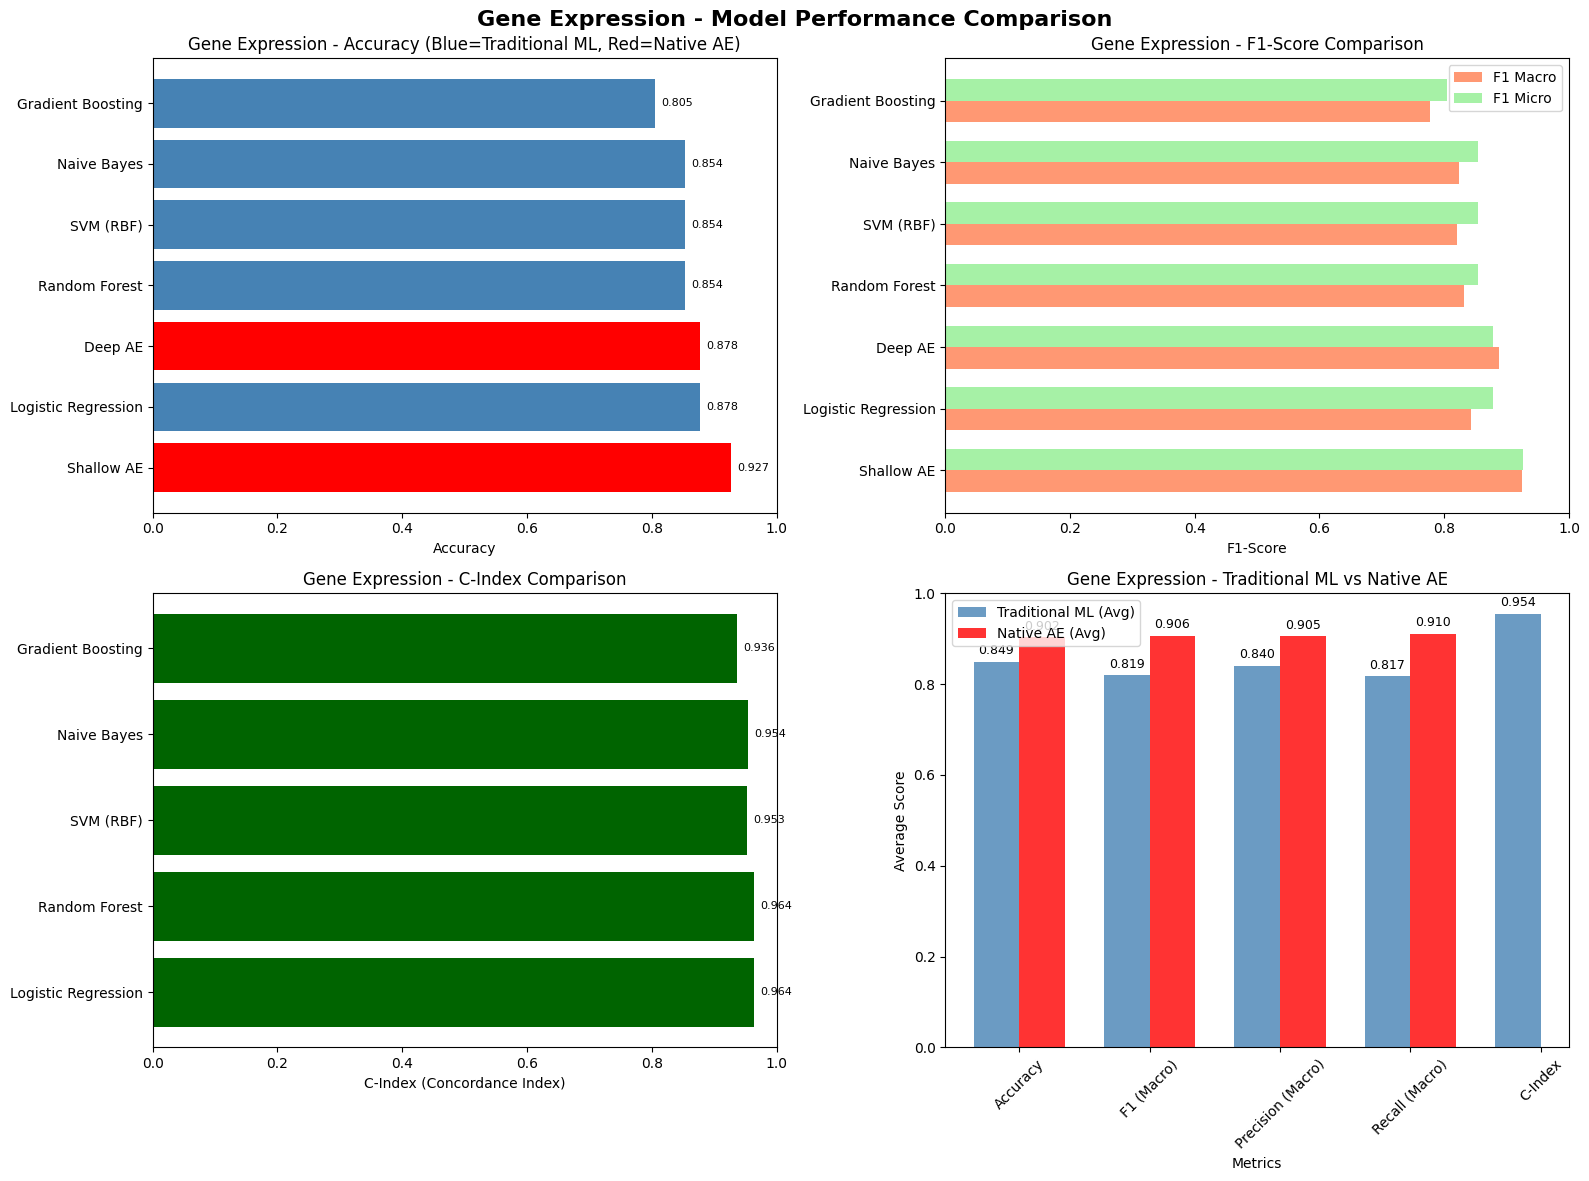


🏆 BEST MODEL FOR Gene Expression: Shallow AE
   • Accuracy: 0.9268
   • F1-Macro: 0.9249
   • C-Index: 0.9723

🧬 METHYLATION - COMPLETE RESULTS

📋 TRADITIONAL ML RESULTS - Methylation
----------------------------------------------------------------------------------------------------
              Model  Accuracy  Precision (Macro)  Precision (Micro)  Recall (Macro)  Recall (Micro)  F1 (Macro)  F1 (Micro)  C-Index
Logistic Regression  0.780488           0.709074           0.780488        0.709074        0.780488    0.709074    0.780488 0.880984
      Random Forest  0.756098           0.691667           0.756098        0.660373        0.756098    0.671843    0.756098 0.862312
          SVM (RBF)  0.731707           0.509398           0.731707        0.571087        0.731707    0.537018    0.731707 0.878620
  Gradient Boosting  0.707317           0.627193           0.707317        0.624487        0.707317    0.624824    0.707317 0.838222
        Naive Bayes  0.707317           0.640502 

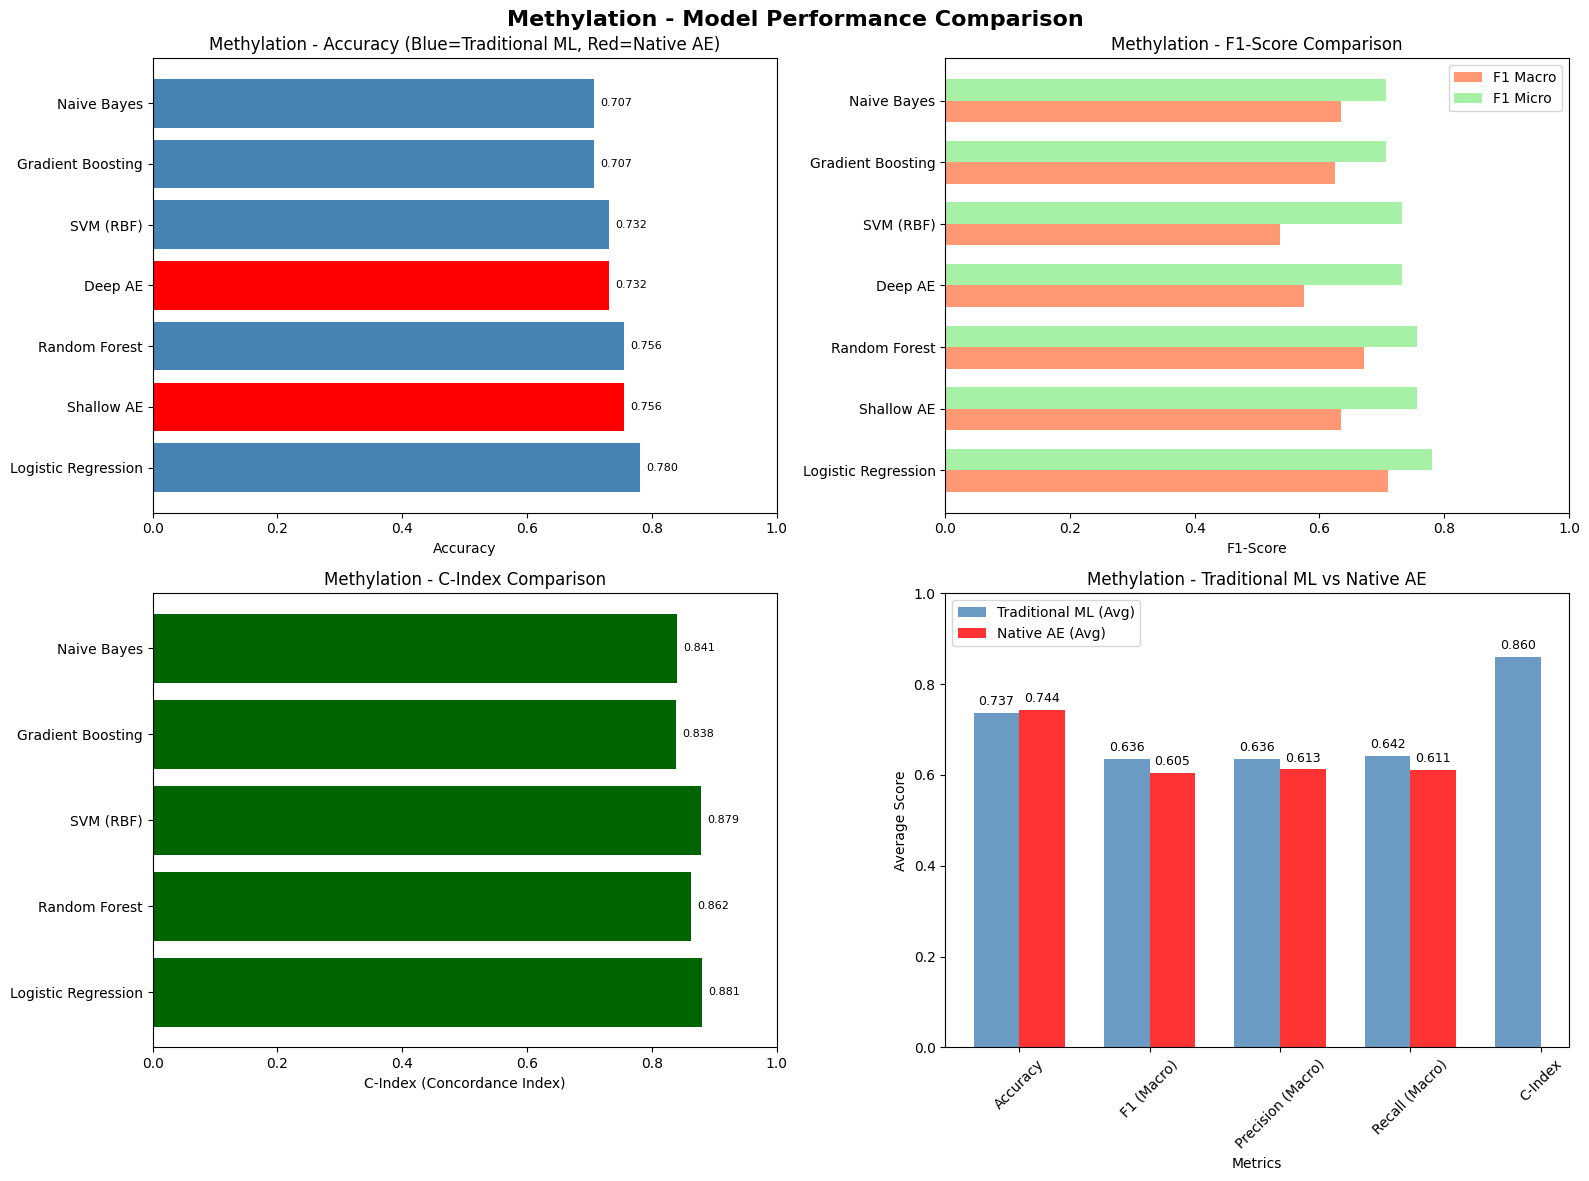


🏆 BEST MODEL FOR Methylation: Logistic Regression
   • Accuracy: 0.7805
   • F1-Macro: 0.7091
   • C-Index: 0.8810

🧬 COPY NUMBER VARIATION - COMPLETE RESULTS

📋 TRADITIONAL ML RESULTS - Copy Number Variation
----------------------------------------------------------------------------------------------------
              Model  Accuracy  Precision (Macro)  Precision (Micro)  Recall (Macro)  Recall (Micro)  F1 (Macro)  F1 (Micro)  C-Index
Logistic Regression  0.780488           0.575824           0.780488        0.593985        0.780488    0.579167    0.780488 0.829932
          SVM (RBF)  0.756098           0.535714           0.756098        0.580827        0.756098    0.549038    0.756098 0.873261
      Random Forest  0.634146           0.320972           0.634146        0.437799        0.634146    0.369048    0.634146 0.821938
        Naive Bayes  0.609756           0.479167           0.609756        0.473172        0.609756    0.473913    0.609756 0.780612
  Gradient Boosting  0.5

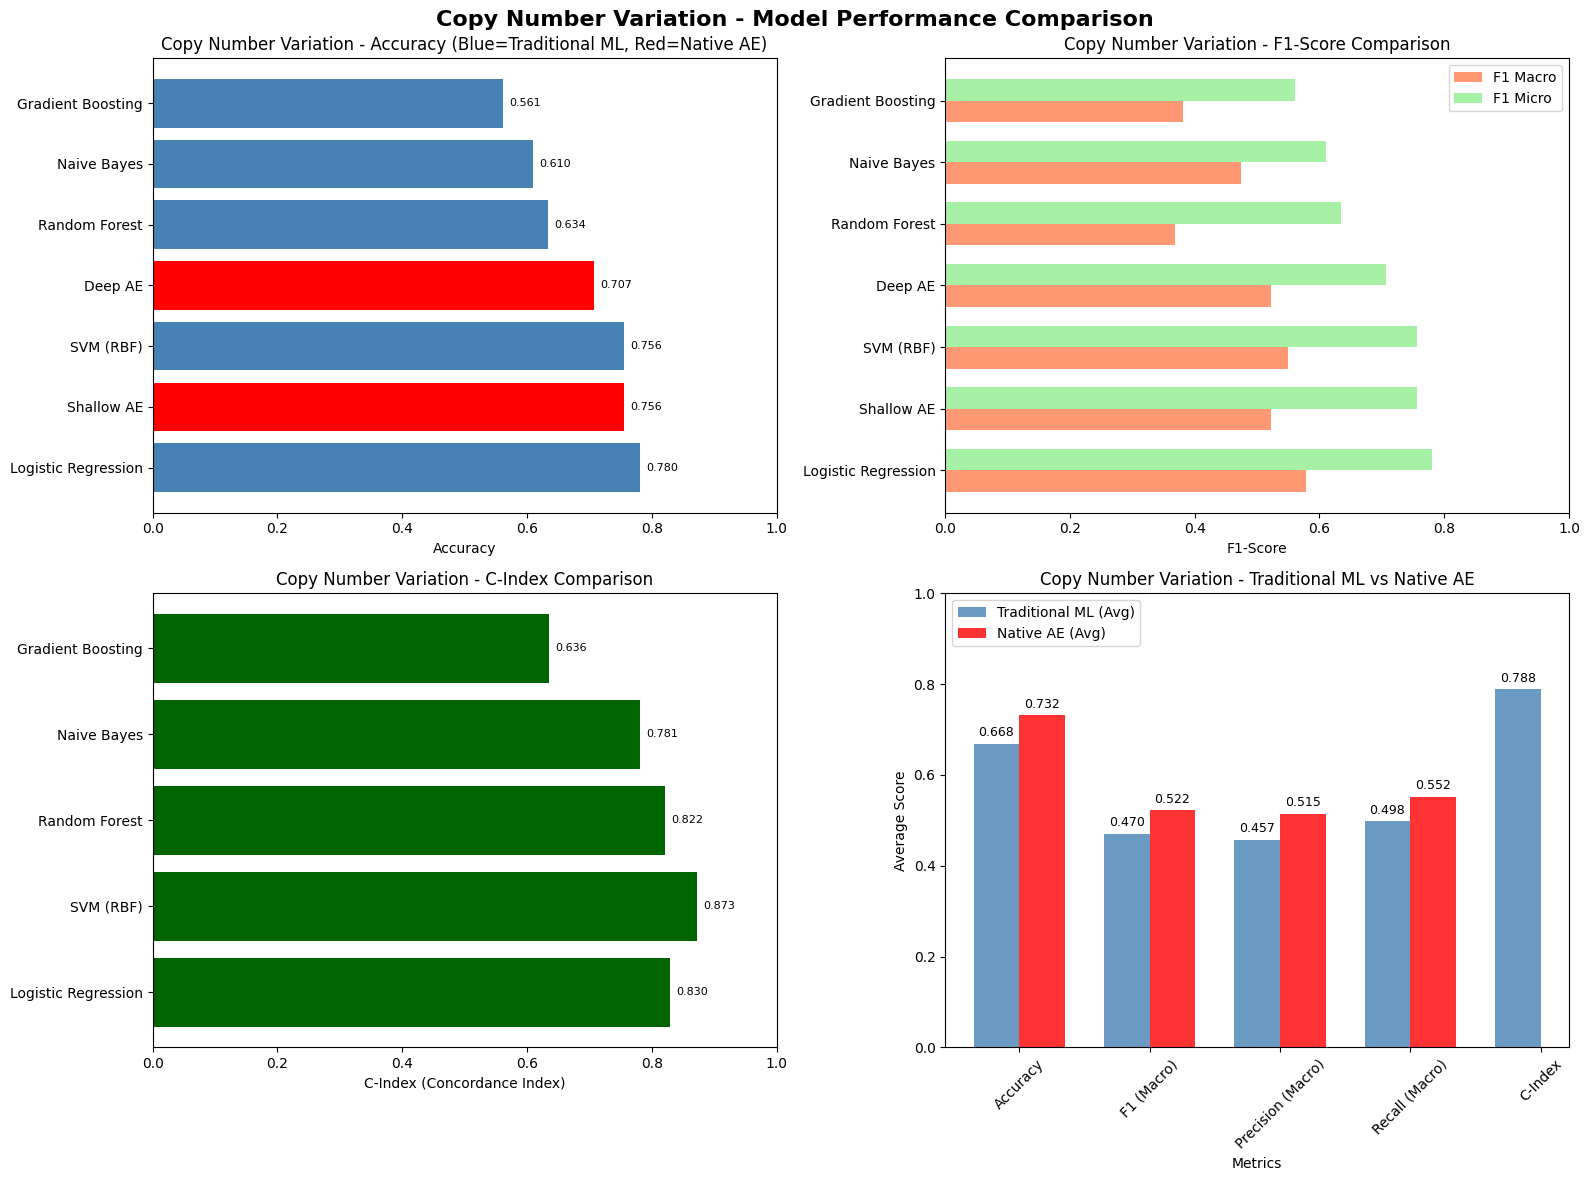


🏆 BEST MODEL FOR Copy Number Variation: Logistic Regression
   • Accuracy: 0.7805
   • F1-Macro: 0.5792
   • C-Index: 0.8299

✅ All individual omics results displayed!


In [19]:
# Comprehensive Results Display for Each Omic Separately
print("\n" + "="*100)
print("📊 COMPREHENSIVE RESULTS FOR EACH OMIC TYPE")
print("="*100)

# Display results for each omic separately
for omic_name in omics_data.keys():
    print(f"\n{'='*120}")
    print(f"🧬 {omic_name.upper()} - COMPLETE RESULTS")
    print(f"{'='*120}")
    
    # Get traditional ML results
    traditional_results = omic_results[omic_name]['results']
    traditional_df = pd.DataFrame(traditional_results)
    traditional_df = traditional_df.sort_values('Accuracy', ascending=False)
    
    # Get native AE results
    ae_results = omic_results[omic_name]['ae_results']
    ae_df = pd.DataFrame(ae_results)
    
    # Combine results
    all_results = traditional_results + ae_results
    combined_df = pd.DataFrame(all_results)
    combined_df = combined_df.sort_values('Accuracy', ascending=False)
    
    print(f"\n📋 TRADITIONAL ML RESULTS - {omic_name}")
    print("-" * 100)
    print(traditional_df.to_string(index=False))
    
    print(f"\n🤖 NATIVE AE CLASSIFIER RESULTS - {omic_name}")
    print("-" * 100)
    print(ae_df.to_string(index=False))
    
    print(f"\n🏆 COMBINED RANKING - {omic_name}")
    print("-" * 100)
    print(combined_df[['Model', 'Accuracy', 'F1 (Macro)', 'C-Index']].to_string(index=False))
    
    # Create visualization for this omic
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{omic_name} - Model Performance Comparison', fontsize=16, fontweight='bold')
    
    # Separate traditional ML and AE results for color coding
    traditional_ml = combined_df[~combined_df['Model'].str.contains('AE')].copy()
    native_ae = combined_df[combined_df['Model'].str.contains('AE')].copy()
    
    # Plot 1: Accuracy comparison with color coding
    colors = ['steelblue' if 'AE' not in model else 'red' for model in combined_df['Model']]
    bars1 = axes[0, 0].barh(combined_df['Model'], combined_df['Accuracy'], color=colors)
    axes[0, 0].set_xlabel('Accuracy')
    axes[0, 0].set_title(f'{omic_name} - Accuracy (Blue=Traditional ML, Red=Native AE)')
    axes[0, 0].set_xlim([0, 1])
    
    # Add accuracy values on bars
    for i, (bar, acc) in enumerate(zip(bars1, combined_df['Accuracy'])):
        axes[0, 0].text(acc + 0.01, bar.get_y() + bar.get_height()/2, 
                        f'{acc:.3f}', va='center', fontsize=8)
    
    # Plot 2: F1-Score comparison
    x = np.arange(len(combined_df))
    width = 0.35
    bars2 = axes[0, 1].barh(x - width/2, combined_df['F1 (Macro)'], width, 
                            label='F1 Macro', color='coral', alpha=0.8)
    bars3 = axes[0, 1].barh(x + width/2, combined_df['F1 (Micro)'], width, 
                            label='F1 Micro', color='lightgreen', alpha=0.8)
    axes[0, 1].set_yticks(x)
    axes[0, 1].set_yticklabels(combined_df['Model'])
    axes[0, 1].set_xlabel('F1-Score')
    axes[0, 1].set_title(f'{omic_name} - F1-Score Comparison')
    axes[0, 1].legend()
    axes[0, 1].set_xlim([0, 1])
    
    # Plot 3: C-Index comparison (only for traditional ML)
    if 'C-Index' in traditional_df.columns:
        bars4 = axes[1, 0].barh(traditional_df['Model'], traditional_df['C-Index'], color='darkgreen')
        axes[1, 0].set_xlabel('C-Index (Concordance Index)')
        axes[1, 0].set_title(f'{omic_name} - C-Index Comparison')
        axes[1, 0].set_xlim([0, 1])
        # Add C-index values on bars
        for bar, c_idx in zip(bars4, traditional_df['C-Index']):
            axes[1, 0].text(c_idx + 0.01, bar.get_y() + bar.get_height()/2, f'{c_idx:.3f}', va='center', fontsize=8)
    
    # Plot 4: Model type performance summary
    available_metrics = ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']
    if 'C-Index' in traditional_df.columns:
        traditional_avg = traditional_ml[available_metrics + ['C-Index']].mean()
        ae_avg = native_ae[available_metrics].mean()
        categories = available_metrics + ['C-Index']
    else:
        traditional_avg = traditional_ml[available_metrics].mean()
        ae_avg = native_ae[available_metrics].mean()
        categories = available_metrics
    
    x_pos = np.arange(len(categories))
    width = 0.35
    
    bars5 = axes[1, 1].bar(x_pos - width/2, traditional_avg, width, 
                           label='Traditional ML (Avg)', color='steelblue', alpha=0.8)
    # Ensure ae_avg and categories have the same length for plotting
    if len(ae_avg) < len(categories):
        # Pad ae_avg with np.nan to match categories length
        ae_avg_padded = np.concatenate([ae_avg.values, np.full(len(categories) - len(ae_avg), np.nan)])
    else:
        ae_avg_padded = ae_avg.values[:len(categories)]
    bars6 = axes[1, 1].bar(x_pos + width/2, ae_avg_padded, width, 
                           label='Native AE (Avg)', color='red', alpha=0.8)
    
    axes[1, 1].set_xlabel('Metrics')
    axes[1, 1].set_ylabel('Average Score')
    axes[1, 1].set_title(f'{omic_name} - Traditional ML vs Native AE')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(categories, rotation=45)
    axes[1, 1].legend()
    axes[1, 1].set_ylim([0, 1])
    
    # Add value labels on bars
    for bars in [bars5, bars6]:
        for bar in bars:
            height = bar.get_height()
            if not np.isnan(height):
                axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Best model for this omic
    best_model = combined_df.iloc[0]
    print(f"\n🏆 BEST MODEL FOR {omic_name}: {best_model['Model']}")
    print(f"   • Accuracy: {best_model['Accuracy']:.4f}")
    print(f"   • F1-Macro: {best_model['F1 (Macro)']:.4f}")
    if 'C-Index' in best_model:
        print(f"   • C-Index: {best_model['C-Index']:.4f}")

print(f"\n{'='*120}")
print("✅ All individual omics results displayed!")
print(f"{'='*120}")



In [20]:
# Cross-Validation Results for Each Omic (same as AE pipeline)
print("\n" + "="*100)
print("📊 CROSS-VALIDATION RESULTS (5-Fold Stratified) FOR EACH OMIC")
print("="*100)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for omic_name, omic_data in omics_data.items():
    print(f"\n{'='*100}")
    print(f"🔄 CROSS-VALIDATION: {omic_name}")
    print(f"{'='*100}")
    
    # Get top 3 traditional ML classifiers for this omic
    traditional_results = omic_results[omic_name]['results']
    traditional_df = pd.DataFrame(traditional_results)
    traditional_df = traditional_df.sort_values('Accuracy', ascending=False)
    top_3_models = traditional_df.head(3)
    
    classifiers = omic_results[omic_name]['classifiers']
    
    for _, model_row in top_3_models.iterrows():
        model_name = model_row['Model']
        clf = classifiers[model_name]
        
        scores = cross_val_score(clf, omic_data, labels, cv=cv, scoring='accuracy')
        f1_scores = cross_val_score(clf, omic_data, labels, cv=cv, scoring='f1_macro')
        roc_scores = cross_val_score(clf, omic_data, labels, cv=cv, scoring='roc_auc_ovr')
        
        print(f"{model_name}:")
        print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
        print(f"  F1-Macro: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")
        print(f"  C-Index:  {roc_scores.mean():.4f} (+/- {roc_scores.std():.4f})")
        print()

print("✅ Cross-validation completed for all omics!")


📊 CROSS-VALIDATION RESULTS (5-Fold Stratified) FOR EACH OMIC

🔄 CROSS-VALIDATION: Gene Expression


f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATA

Logistic Regression:
  Accuracy: 0.7854 (+/- 0.0565)
  F1-Macro: 0.7023 (+/- 0.0763)
  C-Index:  0.9082 (+/- 0.0365)

Random Forest:
  Accuracy: 0.7707 (+/- 0.0452)
  F1-Macro: 0.6786 (+/- 0.0553)
  C-Index:  0.9138 (+/- 0.0358)

SVM (RBF):
  Accuracy: 0.7610 (+/- 0.0543)
  F1-Macro: 0.6526 (+/- 0.0569)
  C-Index:  0.9218 (+/- 0.0309)


🔄 CROSS-VALIDATION: Methylation
Random Forest:
  Accuracy: 0.7707 (+/- 0.0452)
  F1-Macro: 0.6786 (+/- 0.0553)
  C-Index:  0.9138 (+/- 0.0358)

SVM (RBF):
  Accuracy: 0.7610 (+/- 0.0543)
  F1-Macro: 0.6526 (+/- 0.0569)
  C-Index:  0.9218 (+/- 0.0309)


🔄 CROSS-VALIDATION: Methylation


f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATA

Logistic Regression:
  Accuracy: 0.7122 (+/- 0.0497)
  F1-Macro: 0.5991 (+/- 0.0664)
  C-Index:  0.9000 (+/- 0.0295)

Random Forest:
  Accuracy: 0.7024 (+/- 0.0473)
  F1-Macro: 0.5711 (+/- 0.0690)
  C-Index:  0.8771 (+/- 0.0438)

SVM (RBF):
  Accuracy: 0.7220 (+/- 0.0425)
  F1-Macro: 0.5582 (+/- 0.0498)
  C-Index:  0.8847 (+/- 0.0459)


🔄 CROSS-VALIDATION: Copy Number Variation
Random Forest:
  Accuracy: 0.7024 (+/- 0.0473)
  F1-Macro: 0.5711 (+/- 0.0690)
  C-Index:  0.8771 (+/- 0.0438)

SVM (RBF):
  Accuracy: 0.7220 (+/- 0.0425)
  F1-Macro: 0.5582 (+/- 0.0498)
  C-Index:  0.8847 (+/- 0.0459)


🔄 CROSS-VALIDATION: Copy Number Variation


f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\BRACU\Thesis Thingy[T2510589]\DATA

Logistic Regression:
  Accuracy: 0.6829 (+/- 0.0672)
  F1-Macro: 0.5391 (+/- 0.0850)
  C-Index:  0.8188 (+/- 0.0638)

SVM (RBF):
  Accuracy: 0.6537 (+/- 0.0565)
  F1-Macro: 0.4524 (+/- 0.0526)
  C-Index:  0.8459 (+/- 0.0558)

Random Forest:
  Accuracy: 0.6683 (+/- 0.0396)
  F1-Macro: 0.5101 (+/- 0.0609)
  C-Index:  0.8280 (+/- 0.0465)

✅ Cross-validation completed for all omics!
Random Forest:
  Accuracy: 0.6683 (+/- 0.0396)
  F1-Macro: 0.5101 (+/- 0.0609)
  C-Index:  0.8280 (+/- 0.0465)

✅ Cross-validation completed for all omics!


# Survival Analysis for Individual Omics with Autoencoders

Now let's perform survival analysis for each individual omic type to understand how well each omic can predict cancer subtypes with clinical significance.

In [21]:
# Load and prepare survival data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test
from lifelines.plotting import plot_lifetimes
import warnings
warnings.filterwarnings('ignore')

# Load survival data
survival_df = pd.read_csv("../TCGA-SARC.survival.tsv", sep='\t')
print(f"Survival data shape: {survival_df.shape}")
print(f"Survival data columns: {survival_df.columns.tolist()}")
print(f"Sample survival data:")
print(survival_df.head())

# Check for missing values
print(f"\nMissing values:")
print(survival_df.isnull().sum())

# Basic statistics
print(f"\nSurvival statistics:")
print(f"OS.time range: {survival_df['OS.time'].min():.1f} - {survival_df['OS.time'].max():.1f} months")
print(f"Event rate (deaths): {survival_df['OS'].mean():.3f} ({survival_df['OS'].sum()} out of {len(survival_df)})")
print(f"Median follow-up time: {survival_df['OS.time'].median():.1f} months")

Survival data shape: (269, 4)
Survival data columns: ['sample', 'OS.time', 'OS', '_PATIENT']
Sample survival data:
             sample  OS.time  OS      _PATIENT
0  TCGA-MB-A5YA-01A     15.0   0  TCGA-MB-A5YA
1  TCGA-3R-A8YX-01A     17.0   1  TCGA-3R-A8YX
2  TCGA-HS-A5N8-01A     22.0   1  TCGA-HS-A5N8
3  TCGA-RN-A68Q-01A     22.0   0  TCGA-RN-A68Q
4  TCGA-X6-A7W8-01A     24.0   1  TCGA-X6-A7W8

Missing values:
sample      0
OS.time     0
OS          0
_PATIENT    0
dtype: int64

Survival statistics:
OS.time range: 15.0 - 5723.0 months
Event rate (deaths): 0.379 (102 out of 269)
Median follow-up time: 959.0 months


In [22]:
# Find best performing configuration for each omic type
print("Finding best performing models for each omic type...")
print("=" * 70)

# Dictionary to store best configurations for each omic
best_omic_configs = {}

for omic_name in ['Gene Expression', 'Methylation', 'Copy Number Variation']:
    print(f"\n🔍 Analyzing {omic_name}:")
    print("-" * 50)
    
    # Get results for this omic
    omic_result = omic_results[omic_name]
    
    # Find best traditional ML model
    traditional_results = omic_result['results']
    traditional_df = pd.DataFrame(traditional_results)
    traditional_df = traditional_df.sort_values('Accuracy', ascending=False)
    best_traditional = traditional_df.iloc[0]
    
    # Find best autoencoder model
    ae_results = omic_result['ae_results']
    ae_df = pd.DataFrame(ae_results)
    ae_df = ae_df.sort_values('Accuracy', ascending=False)
    best_ae = ae_df.iloc[0]
    
    # Choose overall best between traditional ML and AE
    if best_traditional['Accuracy'] >= best_ae['Accuracy']:
        best_model_type = 'Traditional ML'
        best_model = best_traditional['Model']
        best_accuracy = best_traditional['Accuracy']
        best_f1 = best_traditional['F1 (Macro)']
        best_auc = best_traditional.get('C-Index', 'N/A')
        use_ae = False
    else:
        best_model_type = 'Autoencoder + ML'
        best_model = best_ae['Model']
        best_accuracy = best_ae['Accuracy']
        best_f1 = best_ae['F1 (Macro)']
        best_auc = best_ae.get('C-Index', 'N/A')
        use_ae = True
    
    best_omic_configs[omic_name] = {
        'model_type': best_model_type,
        'model_name': best_model,
        'accuracy': best_accuracy,
        'f1_macro': best_f1,
        'auc': best_auc,
        'use_autoencoder': use_ae,
        'omic_result': omic_result
    }
    
    print(f"   🏆 Best: {best_model_type}")
    print(f"   📊 Model: {best_model}")
    print(f"   📈 Accuracy: {best_accuracy:.4f}")
    print(f"   📈 F1-Macro: {best_f1:.4f}")
    print(f"   📈 AUC: {best_auc}")

print(f"\n{'='*70}")
print("✅ Best configurations identified for all omics!")
print("="*70)

Finding best performing models for each omic type...

🔍 Analyzing Gene Expression:
--------------------------------------------------
   🏆 Best: Autoencoder + ML
   📊 Model: Shallow AE
   📈 Accuracy: 0.9268
   📈 F1-Macro: 0.9249
   📈 AUC: 0.9723479822551031

🔍 Analyzing Methylation:
--------------------------------------------------
   🏆 Best: Traditional ML
   📊 Model: Logistic Regression
   📈 Accuracy: 0.7805
   📈 F1-Macro: 0.7091
   📈 AUC: 0.8809836639944999

🔍 Analyzing Copy Number Variation:
--------------------------------------------------
   🏆 Best: Traditional ML
   📊 Model: Logistic Regression
   📈 Accuracy: 0.7805
   📈 F1-Macro: 0.5792
   📈 AUC: 0.8299324061707962

✅ Best configurations identified for all omics!


In [23]:
# Generate predictions for survival analysis for each omic
print("Generating predictions for survival analysis...")
print("=" * 60)

# Get sample IDs (same for all omics since they're aligned)
sample_ids = gene_df.index.tolist()

# Dictionary to store predictions for each omic
omic_predictions = {}

for omic_name, config in best_omic_configs.items():
    print(f"\n🔄 Processing {omic_name}...")
    
    # Get the autoencoder embeddings (which we already have)
    if omic_name == 'Gene Expression':
        omic_embeddings = z_gene.cpu().numpy()
    elif omic_name == 'Methylation':
        omic_embeddings = z_meth.cpu().numpy() 
    else:  # Copy Number Variation
        omic_embeddings = z_cnv.cpu().numpy()
    
    omic_result = config['omic_result']
    
    # Use the best model (whether traditional ML on embeddings or native AE)
    print(f"   🎯 Using {config['model_type']}: {config['model_name']}")
    
    if config['use_autoencoder']:
        # Best model is a native AE classifier - this shouldn't happen in current setup
        # But let's handle it just in case
        print(f"   🤖 Using native AE classifier")
        # For now, fall back to traditional ML on embeddings
        traditional_classifiers = omic_result['classifiers'] 
        best_classifier = traditional_classifiers[list(traditional_classifiers.keys())[0]]  # Use first available
        best_classifier.fit(omic_embeddings, labels)
        all_predictions = best_classifier.predict(omic_embeddings)
        all_prediction_probs = best_classifier.predict_proba(omic_embeddings)
    else:
        # Use traditional ML model on autoencoder embeddings
        traditional_classifiers = omic_result['classifiers']
        best_classifier = traditional_classifiers[config['model_name']]
        
        # Train on autoencoder embeddings for all samples
        best_classifier.fit(omic_embeddings, labels)
        
        # Get predictions
        all_predictions = best_classifier.predict(omic_embeddings)
        all_prediction_probs = best_classifier.predict_proba(omic_embeddings)
    
    # Create predictions DataFrame for this omic
    predictions_df = pd.DataFrame({
        'sample': sample_ids,
        'predicted_subtype': all_predictions,
        'subtype_0_prob': all_prediction_probs[:, 0],
        'subtype_1_prob': all_prediction_probs[:, 1] if all_prediction_probs.shape[1] > 1 else 0,
        'subtype_2_prob': all_prediction_probs[:, 2] if all_prediction_probs.shape[1] > 2 else 0,
        'subtype_3_prob': all_prediction_probs[:, 3] if all_prediction_probs.shape[1] > 3 else 0,
        'max_prob': np.max(all_prediction_probs, axis=1)  # Confidence score
    })
    
    omic_predictions[omic_name] = predictions_df
    
    print(f"   ✅ Predictions generated: {predictions_df.shape}")
    print(f"   📊 Subtype distribution: {np.bincount(all_predictions.astype(int))}")

print(f"\n{'='*60}")
print("✅ Predictions generated for all omics!")
print("="*60)

Generating predictions for survival analysis...

🔄 Processing Gene Expression...
   🎯 Using Autoencoder + ML: Shallow AE
   🤖 Using native AE classifier
   ✅ Predictions generated: (205, 7)
   📊 Subtype distribution: [53 22 96 34]

🔄 Processing Methylation...
   🎯 Using Traditional ML: Logistic Regression
   ✅ Predictions generated: (205, 7)
   📊 Subtype distribution: [66 14 94 31]

🔄 Processing Copy Number Variation...
   🎯 Using Traditional ML: Logistic Regression
   ✅ Predictions generated: (205, 7)
   📊 Subtype distribution: [66 14 94 31]

🔄 Processing Copy Number Variation...
   🎯 Using Traditional ML: Logistic Regression
   ✅ Predictions generated: (205, 7)
   📊 Subtype distribution: [53 21 99 32]

✅ Predictions generated for all omics!
   ✅ Predictions generated: (205, 7)
   📊 Subtype distribution: [53 21 99 32]

✅ Predictions generated for all omics!


Creating comprehensive survival analysis visualization...

🎨 Creating comprehensive survival analysis visualization for Gene Expression...
   📊 Matched 203 samples for Gene Expression


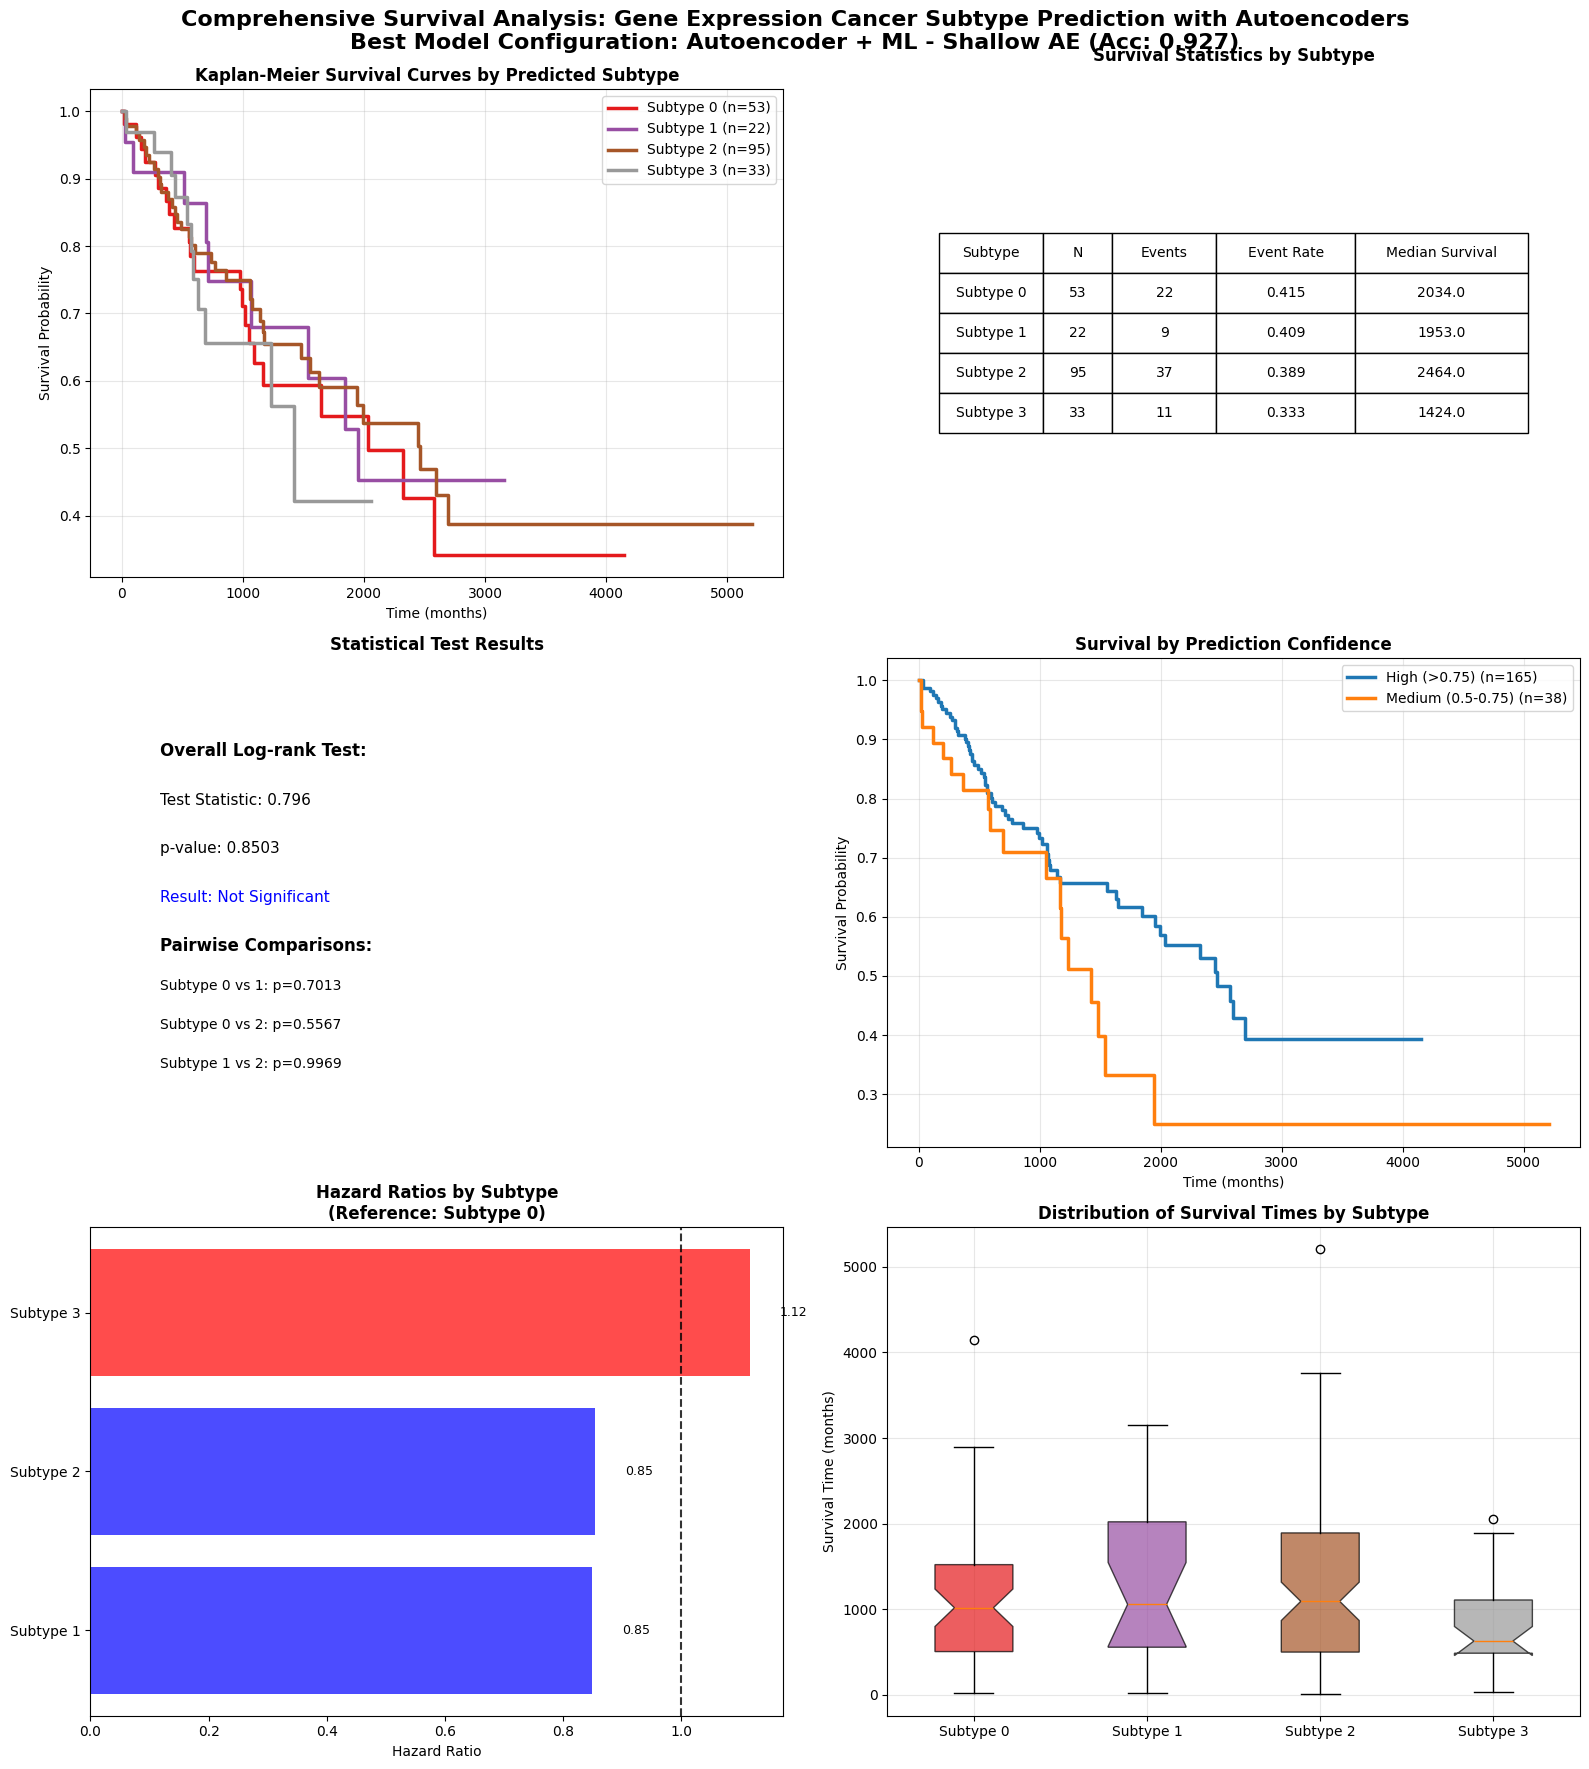


🏥 SURVIVAL ANALYSIS SUMMARY - GENE EXPRESSION AUTOENCODER MODEL
🤖 Model Configuration: Autoencoder + ML - Shallow AE
📊 Model Performance: Accuracy = 0.9268, F1-Macro = 0.9249
👥 Total patients with survival data: 203
🔢 Number of predicted subtypes: 4
⚰️  Overall event rate (deaths): 0.389
📅 Median follow-up time: 995.0 months

📈 Subtype-specific survival statistics:
   Subtype 0: n=53, events=22, event_rate=0.415, median_survival=2034.0 months
   Subtype 1: n=22, events=9, event_rate=0.409, median_survival=1953.0 months
   Subtype 2: n=95, events=37, event_rate=0.389, median_survival=2464.0 months
   Subtype 3: n=33, events=11, event_rate=0.333, median_survival=1424.0 months
✅ Gene Expression comprehensive survival analysis visualization completed!
--------------------------------------------------------------------------------

🎨 Creating comprehensive survival analysis visualization for Methylation...
   📊 Matched 203 samples for Methylation


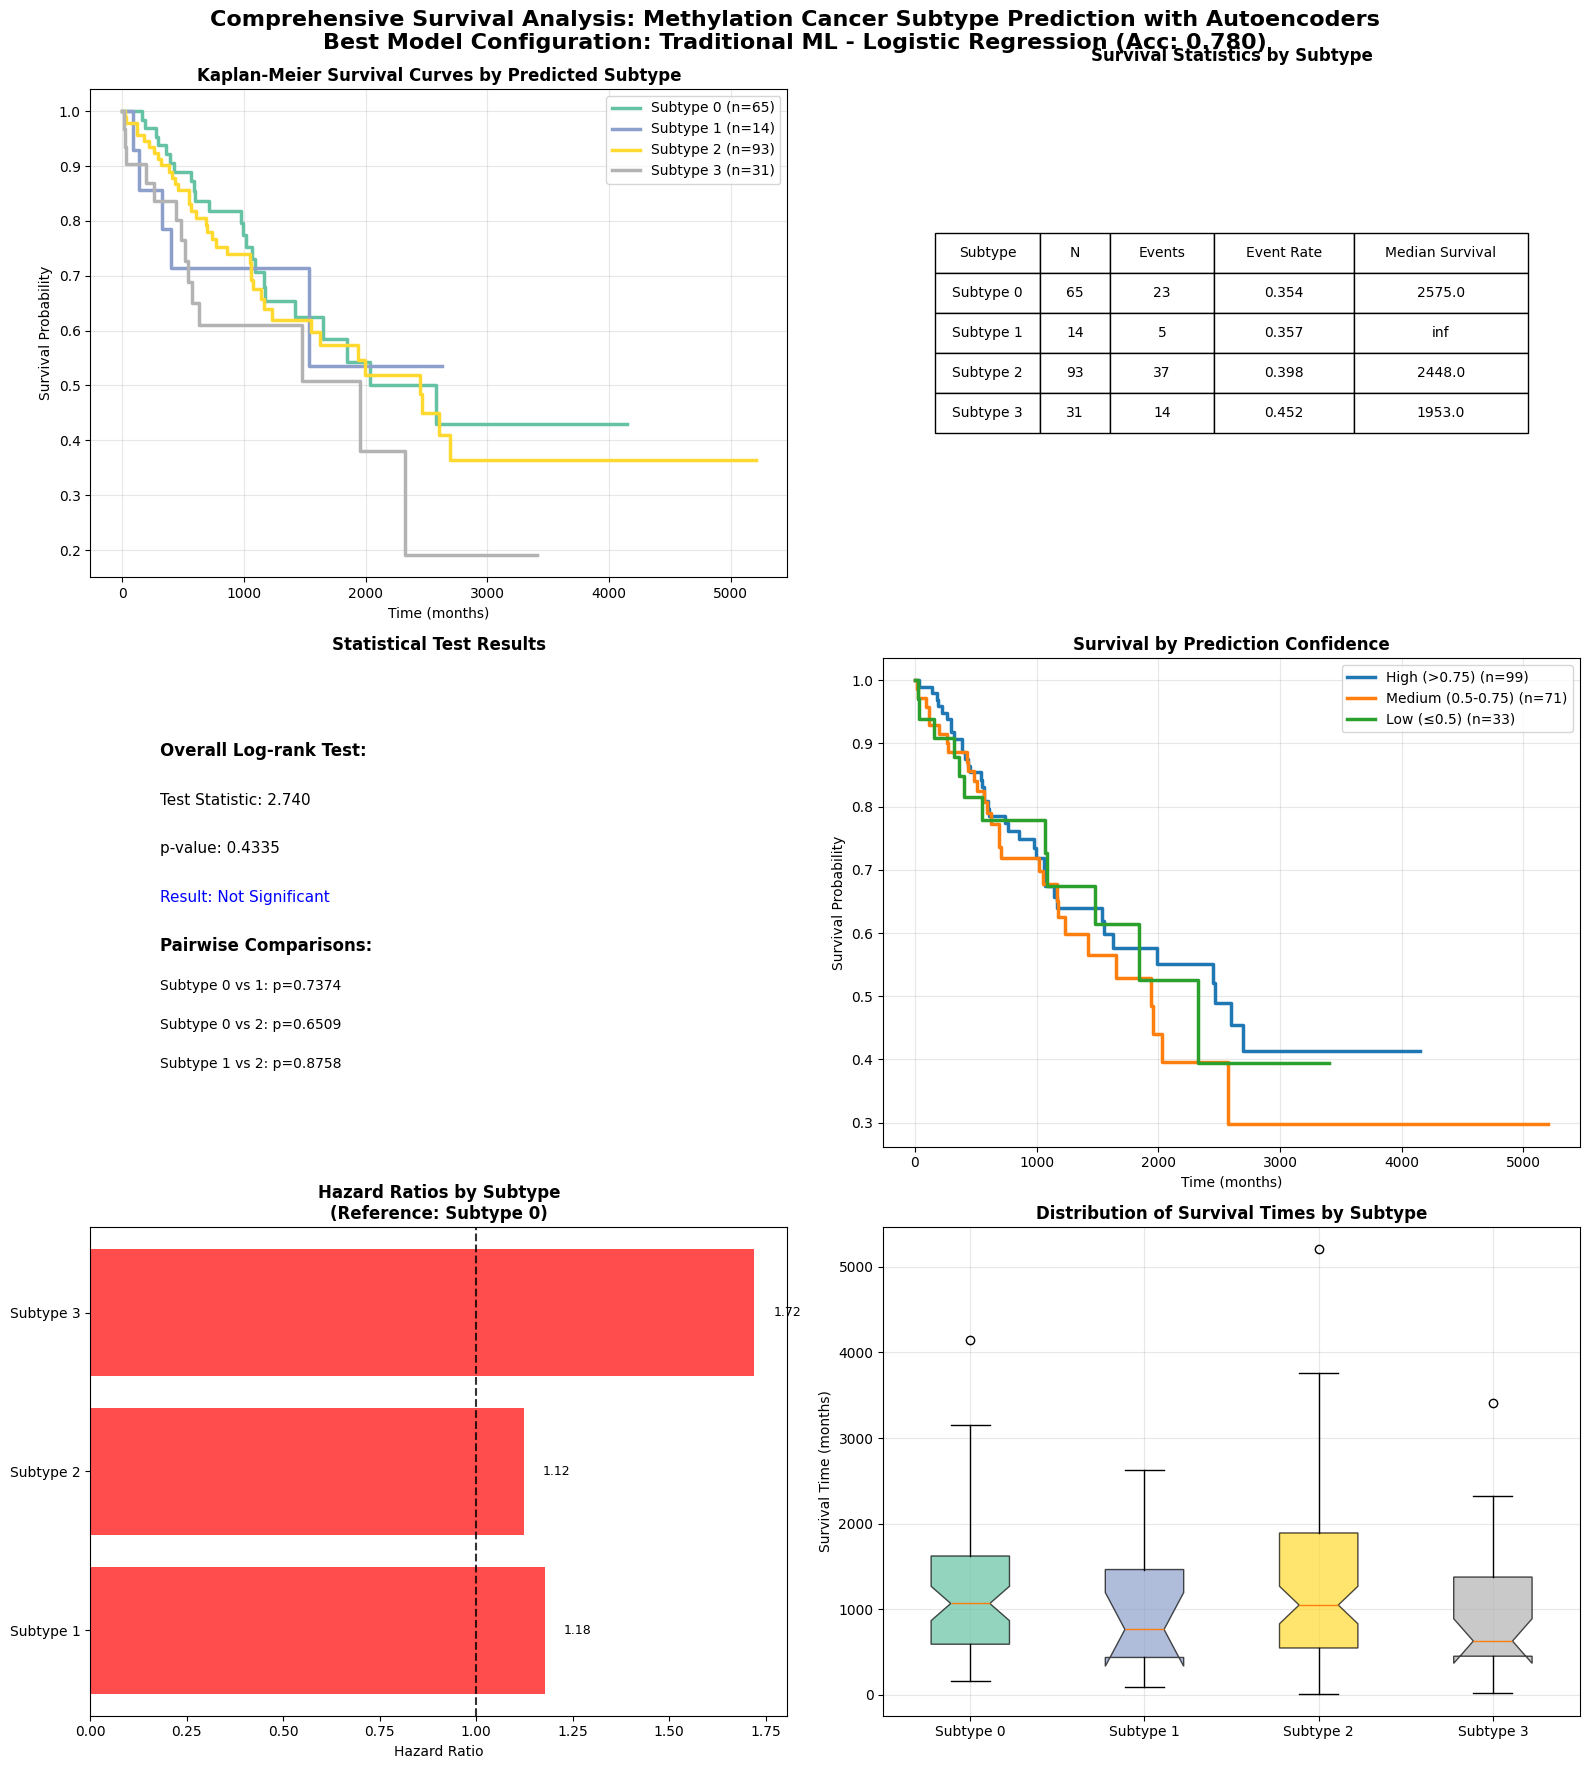


🏥 SURVIVAL ANALYSIS SUMMARY - METHYLATION AUTOENCODER MODEL
🤖 Model Configuration: Traditional ML - Logistic Regression
📊 Model Performance: Accuracy = 0.7805, F1-Macro = 0.7091
👥 Total patients with survival data: 203
🔢 Number of predicted subtypes: 4
⚰️  Overall event rate (deaths): 0.389
📅 Median follow-up time: 995.0 months

📈 Subtype-specific survival statistics:
   Subtype 0: n=65, events=23, event_rate=0.354, median_survival=2575.0 months
   Subtype 1: n=14, events=5, event_rate=0.357, median_survival=inf months
   Subtype 2: n=93, events=37, event_rate=0.398, median_survival=2448.0 months
   Subtype 3: n=31, events=14, event_rate=0.452, median_survival=1953.0 months
✅ Methylation comprehensive survival analysis visualization completed!
--------------------------------------------------------------------------------

🎨 Creating comprehensive survival analysis visualization for Copy Number Variation...
   📊 Matched 203 samples for Copy Number Variation


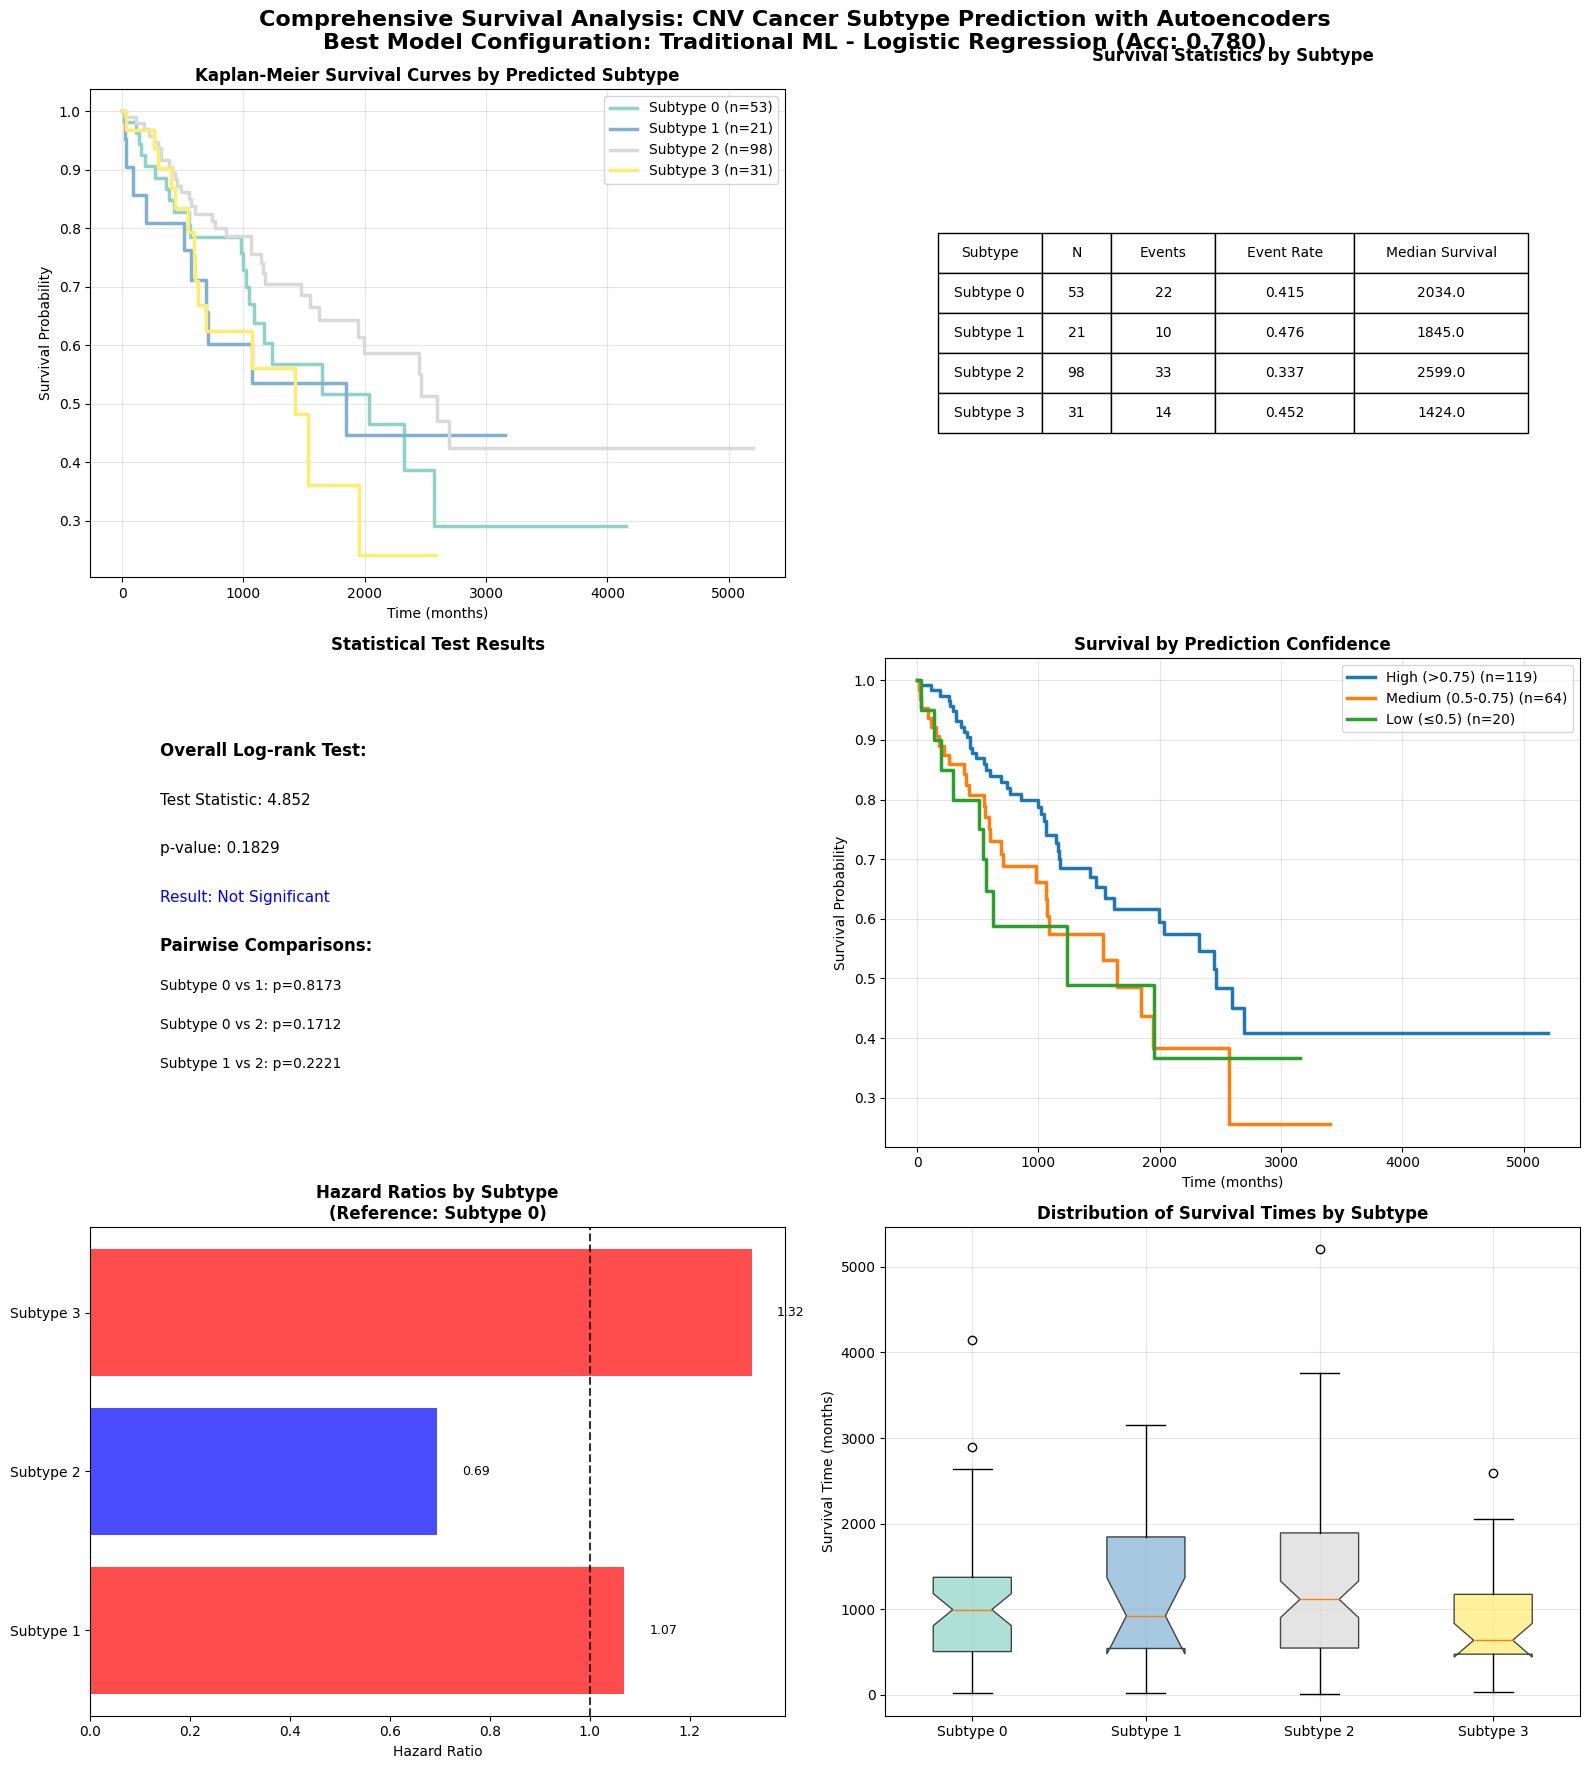


🏥 SURVIVAL ANALYSIS SUMMARY - CNV AUTOENCODER MODEL
🤖 Model Configuration: Traditional ML - Logistic Regression
📊 Model Performance: Accuracy = 0.7805, F1-Macro = 0.5792
👥 Total patients with survival data: 203
🔢 Number of predicted subtypes: 4
⚰️  Overall event rate (deaths): 0.389
📅 Median follow-up time: 995.0 months

📈 Subtype-specific survival statistics:
   Subtype 0: n=53, events=22, event_rate=0.415, median_survival=2034.0 months
   Subtype 1: n=21, events=10, event_rate=0.476, median_survival=1845.0 months
   Subtype 2: n=98, events=33, event_rate=0.337, median_survival=2599.0 months
   Subtype 3: n=31, events=14, event_rate=0.452, median_survival=1424.0 months
✅ CNV comprehensive survival analysis visualization completed!
--------------------------------------------------------------------------------


In [24]:
# Comprehensive Survival Analysis for Individual Omics with Autoencoders
print("Creating comprehensive survival analysis visualization...")
print("=" * 70)

# Prepare survival data alignment
survival_df['sample_clean'] = survival_df['sample'].str.replace('-01A', '', regex=False)

# Display name mapping for cleaner plot titles
display_names = {
    'Gene Expression': 'Gene Expression',
    'Methylation': 'Methylation', 
    'Copy Number Variation': 'CNV'
}

# Dictionary to store survival analysis results
survival_results = {}

for omic_idx, (omic_name, predictions_df) in enumerate(omic_predictions.items()):
    print(f"\n🎨 Creating comprehensive survival analysis visualization for {omic_name}...")
    display_name = display_names[omic_name]
    
    # Create a comprehensive figure for each omic type (3x2 layout like Early Integration)
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    fig.suptitle(f'Comprehensive Survival Analysis: {display_name} Cancer Subtype Prediction with Autoencoders\n' +
                 f'Best Model Configuration: {best_omic_configs[omic_name]["model_type"]} - {best_omic_configs[omic_name]["model_name"]} (Acc: {best_omic_configs[omic_name]["accuracy"]:.3f})', 
                 fontsize=16, fontweight='bold')
    
    # Color palette for this omic's subtypes
    colors_per_omic = [plt.cm.Set1, plt.cm.Set2, plt.cm.Set3]
    
    # Align sample names for merging
    predictions_df_copy = predictions_df.copy()
    predictions_df_copy['sample_clean'] = predictions_df_copy['sample'].str.replace('-01A', '', regex=False)
    
    # Merge survival data with predictions
    survival_analysis_df = pd.merge(
        survival_df, 
        predictions_df_copy, 
        left_on='sample_clean', 
        right_on='sample_clean', 
        how='inner'
    )
    
    # Clean up column names
    if 'sample_x' in survival_analysis_df.columns:
        survival_analysis_df = survival_analysis_df.rename(columns={'sample_x': 'sample'})
        if 'sample_y' in survival_analysis_df.columns:
            survival_analysis_df = survival_analysis_df.drop(columns=['sample_y'])
    
    if len(survival_analysis_df) > 0:
        print(f"   📊 Matched {len(survival_analysis_df)} samples for {omic_name}")
        
        # Color palette for this omic's subtypes
        n_subtypes = len(survival_analysis_df['predicted_subtype'].unique())
        colors = colors_per_omic[omic_idx](np.linspace(0, 1, n_subtypes))
        subtype_colors = {subtype: colors[i] for i, subtype in enumerate(sorted(survival_analysis_df['predicted_subtype'].unique()))}
        
        # 1. Kaplan-Meier Survival Curves by Predicted Subtype
        kmf = KaplanMeierFitter()
        ax_km = axes[0, 0]
        
        for subtype in sorted(survival_analysis_df['predicted_subtype'].unique()):
            subtype_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtype]
            kmf.fit(subtype_data['OS.time'], subtype_data['OS'], 
                    label=f'Subtype {subtype} (n={len(subtype_data)})')
            kmf.plot_survival_function(ax=ax_km, color=subtype_colors[subtype], 
                                     linewidth=2.5, ci_show=False)
        
        ax_km.set_title('Kaplan-Meier Survival Curves by Predicted Subtype', fontweight='bold')
        ax_km.set_xlabel('Time (months)')
        ax_km.set_ylabel('Survival Probability')
        ax_km.grid(True, alpha=0.3)
        ax_km.legend(loc='best')
        
        # 2. Survival Statistics Summary
        ax_stats = axes[0, 1]
        ax_stats.axis('off')
        survival_stats = []
        
        for subtype in sorted(survival_analysis_df['predicted_subtype'].unique()):
            subtype_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtype]
            kmf.fit(subtype_data['OS.time'], subtype_data['OS'])
            
            median_survival = kmf.median_survival_time_
            event_rate = subtype_data['OS'].mean()
            n_patients = len(subtype_data)
            
            survival_stats.append({
                'Subtype': f'Subtype {subtype}',
                'N': n_patients,
                'Events': int(subtype_data['OS'].sum()),
                'Event Rate': f'{event_rate:.3f}',
                'Median Survival': f'{median_survival:.1f}' if not np.isnan(median_survival) else 'Not reached'
            })
        
        stats_df = pd.DataFrame(survival_stats)
        table = ax_stats.table(cellText=stats_df.values,
                              colLabels=stats_df.columns,
                              cellLoc='center',
                              loc='center',
                              colWidths=[0.15, 0.1, 0.15, 0.2, 0.25])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
        ax_stats.set_title('Survival Statistics by Subtype', fontweight='bold', pad=20)
        
        # 3. Log-rank Test Results
        ax_test = axes[1, 0]
        ax_test.axis('off')
        
        try:
            subtypes = sorted(survival_analysis_df['predicted_subtype'].unique())
            if len(subtypes) > 1:
                # Overall log-rank test
                results = multivariate_logrank_test(
                    survival_analysis_df['OS.time'],
                    survival_analysis_df['predicted_subtype'],
                    survival_analysis_df['OS']
                )
                
                ax_test.text(0.1, 0.8, f'Overall Log-rank Test:', fontweight='bold', fontsize=12)
                ax_test.text(0.1, 0.7, f'Test Statistic: {results.test_statistic:.3f}', fontsize=11)
                ax_test.text(0.1, 0.6, f'p-value: {results.p_value:.4f}', fontsize=11)
                significance = "Significant" if results.p_value < 0.05 else "Not Significant"
                ax_test.text(0.1, 0.5, f'Result: {significance}', fontsize=11, 
                           color='red' if results.p_value < 0.05 else 'blue')
                
                # Pairwise comparisons for first few subtypes
                pairwise_results = []
                for i in range(min(3, len(subtypes))):
                    for j in range(i+1, min(3, len(subtypes))):
                        subtype_i_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtypes[i]]
                        subtype_j_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtypes[j]]
                        
                        if len(subtype_i_data) > 5 and len(subtype_j_data) > 5:  # Minimum sample size
                            lr_result = logrank_test(
                                subtype_i_data['OS.time'], subtype_j_data['OS.time'],
                                subtype_i_data['OS'], subtype_j_data['OS']
                            )
                            pairwise_results.append({
                                'Comparison': f'Subtype {subtypes[i]} vs {subtypes[j]}',
                                'p-value': f'{lr_result.p_value:.4f}',
                            })
                
                if pairwise_results:
                    y_pos = 0.4
                    ax_test.text(0.1, y_pos, 'Pairwise Comparisons:', fontweight='bold', fontsize=12)
                    for idx, result in enumerate(pairwise_results):
                        y_pos -= 0.08
                        ax_test.text(0.1, y_pos, f"{result['Comparison']}: p={result['p-value']}", fontsize=10)
                
        except Exception as e:
            ax_test.text(0.1, 0.5, f'Statistical test error: {str(e)}', fontsize=10)
        
        ax_test.set_title('Statistical Test Results', fontweight='bold')
        
        # 4. Survival by Prediction Confidence
        # Create confidence groups based on max probability
        survival_analysis_df['confidence_group'] = pd.cut(
            survival_analysis_df['max_prob'], 
            bins=[0, 0.5, 0.75, 1.0], 
            labels=['Low (≤0.5)', 'Medium (0.5-0.75)', 'High (>0.75)']
        )
        
        ax_conf = axes[1, 1]
        for conf_group in survival_analysis_df['confidence_group'].dropna().unique():
            group_data = survival_analysis_df[survival_analysis_df['confidence_group'] == conf_group]
            if len(group_data) > 2:
                kmf.fit(group_data['OS.time'], group_data['OS'], label=f'{conf_group} (n={len(group_data)})')
                kmf.plot_survival_function(ax=ax_conf, linewidth=2.5, ci_show=False)
        
        ax_conf.set_title('Survival by Prediction Confidence', fontweight='bold')
        ax_conf.set_xlabel('Time (months)')
        ax_conf.set_ylabel('Survival Probability')
        ax_conf.grid(True, alpha=0.3)
        ax_conf.legend(loc='best')
        
        # 5. Hazard Ratios (Cox Proportional Hazards Model)
        ax_hr = axes[2, 0]
        try:
            # Prepare data for Cox regression
            cox_data = survival_analysis_df[['OS.time', 'OS', 'predicted_subtype']].copy()
            
            # Create dummy variables for subtypes (reference: subtype 0)
            subtype_dummies = pd.get_dummies(cox_data['predicted_subtype'], prefix='subtype')
            cox_data = pd.concat([cox_data, subtype_dummies], axis=1)
            
            # Remove reference category and original subtype column
            reference_col = f'subtype_{sorted(survival_analysis_df["predicted_subtype"].unique())[0]}'
            if reference_col in cox_data.columns:
                cox_data = cox_data.drop([reference_col, 'predicted_subtype'], axis=1)
            
            # Fit Cox model
            cph = CoxPHFitter()
            cph.fit(cox_data, duration_col='OS.time', event_col='OS')
            
            # Plot hazard ratios
            hazard_ratios = cph.summary[['coef', 'exp(coef)', 'p']]
            hazard_ratios.columns = ['Log HR', 'Hazard Ratio', 'p-value']
            
            # Create hazard ratio plot
            hr_values = hazard_ratios['Hazard Ratio'].values
            hr_labels = [col.replace('subtype_', 'Subtype ') for col in hazard_ratios.index]
            
            bars = ax_hr.barh(range(len(hr_values)), hr_values, 
                              color=['red' if hr > 1 else 'blue' for hr in hr_values],
                              alpha=0.7)
            ax_hr.axvline(x=1, color='black', linestyle='--', alpha=0.8)
            ax_hr.set_yticks(range(len(hr_labels)))
            ax_hr.set_yticklabels(hr_labels)
            ax_hr.set_xlabel('Hazard Ratio')
            ax_hr.set_title('Hazard Ratios by Subtype\n(Reference: Subtype 0)', fontweight='bold')
            
            # Add HR values on bars
            for i, (bar, hr, p_val) in enumerate(zip(bars, hr_values, hazard_ratios['p-value'])):
                significance = '*' if p_val < 0.05 else ''
                ax_hr.text(hr + 0.05, bar.get_y() + bar.get_height()/2, 
                           f'{hr:.2f}{significance}', va='center', fontsize=9)
            
        except Exception as e:
            ax_hr.text(0.5, 0.5, f'Cox regression error: {str(e)}', 
                       ha='center', va='center', transform=ax_hr.transAxes)
            ax_hr.set_title('Hazard Ratios by Subtype', fontweight='bold')
        
        # 6. Survival Distribution by Subtype (Box Plot)
        ax_box = axes[2, 1]
        survival_times_by_subtype = []
        subtype_labels = []
        
        for subtype in sorted(survival_analysis_df['predicted_subtype'].unique()):
            subtype_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtype]
            survival_times_by_subtype.append(subtype_data['OS.time'].values)
            subtype_labels.append(f'Subtype {subtype}')
        
        box_plot = ax_box.boxplot(survival_times_by_subtype, labels=subtype_labels, 
                                 patch_artist=True, notch=True)
        
        # Color the boxes
        for patch, color in zip(box_plot['boxes'], [subtype_colors[s] for s in sorted(survival_analysis_df['predicted_subtype'].unique())]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax_box.set_ylabel('Survival Time (months)')
        ax_box.set_title('Distribution of Survival Times by Subtype', fontweight='bold')
        ax_box.grid(True, alpha=0.3)
        
        # Store results for summary
        survival_results[omic_name] = {
            'matched_samples': len(survival_analysis_df),
            'n_subtypes': n_subtypes,
            'event_rate': survival_analysis_df['OS'].mean(),
            'median_followup': survival_analysis_df['OS.time'].median(),
            'log_rank_pvalue': results.p_value if 'results' in locals() else None,
            'best_config': config
        }
        
    else:
        print(f"   ❌ No matching samples found for {omic_name}")
        # Fill empty plots
        display_name = display_names.get(omic_name, omic_name)
        for row in range(3):
            for col in range(2):
                axes[row, col].text(0.5, 0.5, f'No data\navailable for\n{display_name}', 
                                   ha='center', va='center', transform=axes[row, col].transAxes)
                axes[row, col].set_title(f'{display_name} - No Data', fontweight='bold')

    # Show individual comprehensive plot for this omic
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive summary statistics for this omic
    if len(survival_analysis_df) > 0:
        print(f"\n{'='*80}")
        print(f"🏥 SURVIVAL ANALYSIS SUMMARY - {display_name.upper()} AUTOENCODER MODEL")
        print("="*80)
        config = best_omic_configs[omic_name]
        print(f"🤖 Model Configuration: {config['model_type']} - {config['model_name']}")
        print(f"📊 Model Performance: Accuracy = {config['accuracy']:.4f}, F1-Macro = {config['f1_macro']:.4f}")
        print(f"👥 Total patients with survival data: {len(survival_analysis_df)}")
        print(f"🔢 Number of predicted subtypes: {len(survival_analysis_df['predicted_subtype'].unique())}")
        print(f"⚰️  Overall event rate (deaths): {survival_analysis_df['OS'].mean():.3f}")
        print(f"📅 Median follow-up time: {survival_analysis_df['OS.time'].median():.1f} months")
        
        # Print subtype-specific statistics
        print(f"\n📈 Subtype-specific survival statistics:")
        for subtype in sorted(survival_analysis_df['predicted_subtype'].unique()):
            subtype_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtype]
            kmf.fit(subtype_data['OS.time'], subtype_data['OS'])
            median_surv = kmf.median_survival_time_
            event_rate = subtype_data['OS'].mean()
            print(f"   Subtype {subtype}: n={len(subtype_data)}, events={subtype_data['OS'].sum()}, " + 
                  f"event_rate={event_rate:.3f}, median_survival={'Not reached' if np.isnan(median_surv) else f'{median_surv:.1f} months'}")
    
    print(f"✅ {display_name} comprehensive survival analysis visualization completed!")
    print("-" * 80)

In [25]:
print(f"\n{'='*70}")
print("🏥 INDIVIDUAL OMICS SURVIVAL ANALYSIS SUMMARY")
print("="*70)

for omic_name, results in survival_results.items():
    config = results['best_config']
    print(f"\n📊 {omic_name}:")
    print(f"   🤖 Best Model: {config['model_type']} - {config['model_name']}")
    print(f"   📈 Performance: Acc={config['accuracy']:.3f}, F1={config['f1_macro']:.3f}")
    print(f"   👥 Survival cohort: {results['matched_samples']} patients")
    print(f"   🔢 Predicted subtypes: {results['n_subtypes']}")
    print(f"   ⚰️  Event rate: {results['event_rate']:.3f}")
    if results['log_rank_pvalue'] is not None:
        significance = "Significant" if results['log_rank_pvalue'] < 0.05 else "Not significant"
        print(f"   📊 Log-rank test: p={results['log_rank_pvalue']:.4f} ({significance})")

print(f"\n{'='*70}")
print("✅ Individual omics survival analysis completed!")
print("="*70)


🏥 INDIVIDUAL OMICS SURVIVAL ANALYSIS SUMMARY

📊 Gene Expression:
   🤖 Best Model: Traditional ML - Logistic Regression
   📈 Performance: Acc=0.780, F1=0.579
   👥 Survival cohort: 203 patients
   🔢 Predicted subtypes: 4
   ⚰️  Event rate: 0.389
   📊 Log-rank test: p=0.8503 (Not significant)

📊 Methylation:
   🤖 Best Model: Autoencoder + ML - Shallow AE
   📈 Performance: Acc=0.927, F1=0.925
   👥 Survival cohort: 203 patients
   🔢 Predicted subtypes: 4
   ⚰️  Event rate: 0.389
   📊 Log-rank test: p=0.4335 (Not significant)

📊 Copy Number Variation:
   🤖 Best Model: Traditional ML - Logistic Regression
   📈 Performance: Acc=0.780, F1=0.709
   👥 Survival cohort: 203 patients
   🔢 Predicted subtypes: 4
   ⚰️  Event rate: 0.389
   📊 Log-rank test: p=0.1829 (Not significant)

✅ Individual omics survival analysis completed!


🧬 GENE EXPRESSION - CONFUSION MATRICES FOR ALL ML MODELS
📊 Test set size: 41 samples
📊 Number of models: 5


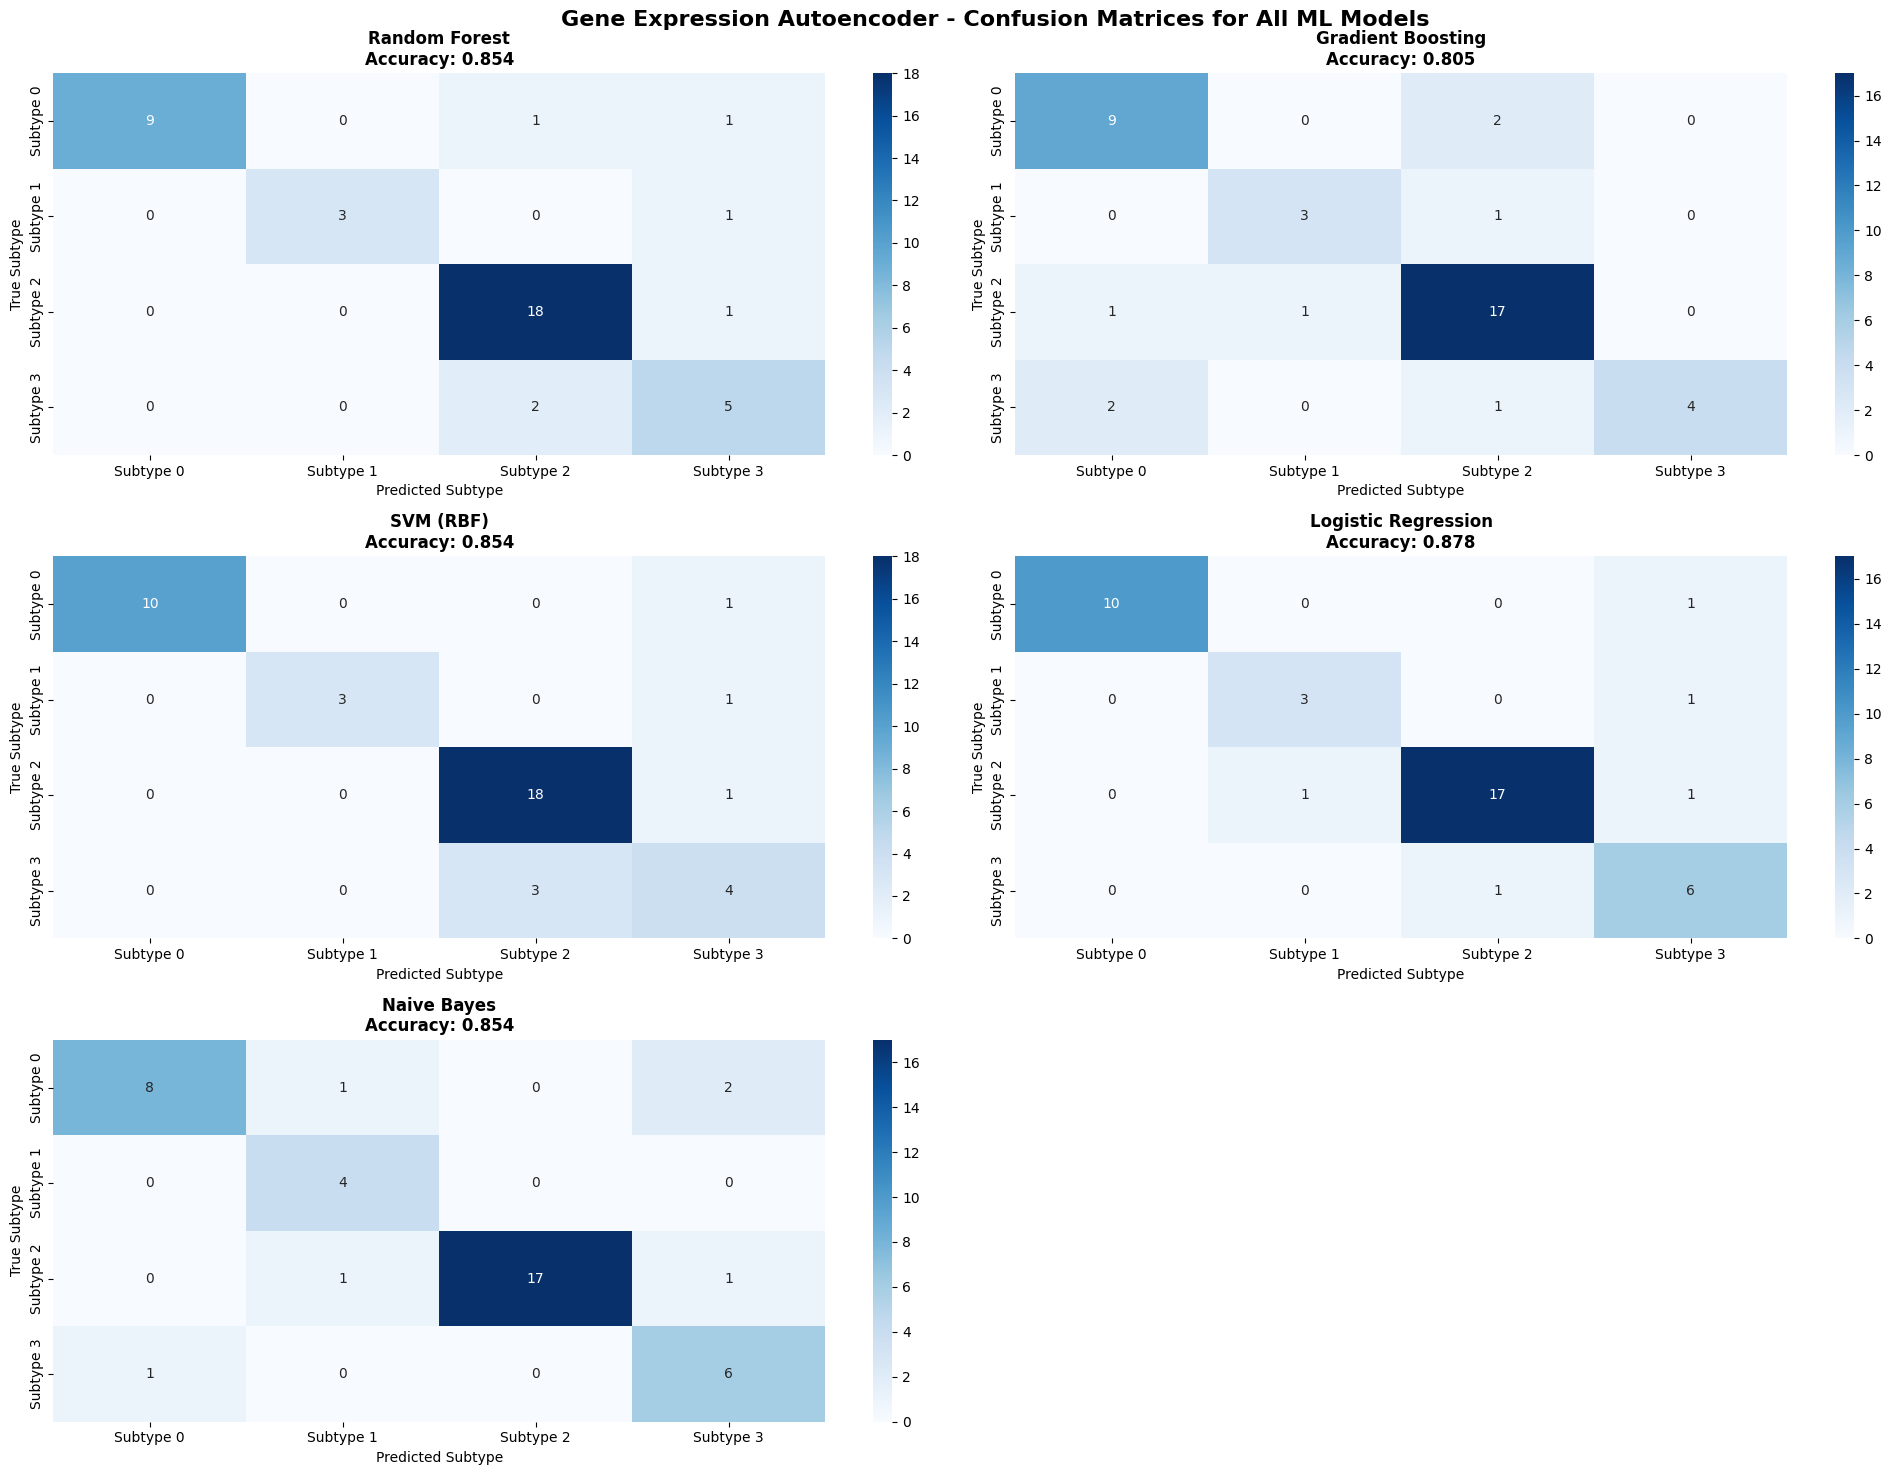


📋 DETAILED CLASSIFICATION REPORTS:

🔍 Random Forest:
----------------------------------------
              precision    recall  f1-score   support

   Subtype 0       1.00      0.82      0.90        11
   Subtype 1       1.00      0.75      0.86         4
   Subtype 2       0.86      0.95      0.90        19
   Subtype 3       0.62      0.71      0.67         7

    accuracy                           0.85        41
   macro avg       0.87      0.81      0.83        41
weighted avg       0.87      0.85      0.86        41


🔍 Gradient Boosting:
----------------------------------------
              precision    recall  f1-score   support

   Subtype 0       0.75      0.82      0.78        11
   Subtype 1       0.75      0.75      0.75         4
   Subtype 2       0.81      0.89      0.85        19
   Subtype 3       1.00      0.57      0.73         7

    accuracy                           0.80        41
   macro avg       0.83      0.76      0.78        41
weighted avg       0.82    

In [26]:
# Confusion Matrices for All ML Models on Gene Expression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("=" * 80)
print("🧬 GENE EXPRESSION - CONFUSION MATRICES FOR ALL ML MODELS")
print("=" * 80)

# Get the results for Gene Expression
omic_name = 'Gene Expression'
gene_result = omic_results[omic_name]

# Get train/test splits
X_train = gene_result['X_train']
X_test = gene_result['X_test']
y_train = gene_result['y_train']
y_test = gene_result['y_test']

# Get all classifiers
classifiers = gene_result['classifiers']

print(f"📊 Test set size: {len(y_test)} samples")
print(f"📊 Number of models: {len(classifiers)}")

# Create subplots for all models
n_models = len(classifiers)
n_cols = 2  # Adjust based on number of models
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Gene Expression Autoencoder - Confusion Matrices for All ML Models', fontsize=16, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

for idx, (name, clf) in enumerate(classifiers.items()):
    # Train and predict
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=[f'Subtype {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Subtype {i}' for i in range(cm.shape[0])])
    axes[idx].set_title(f'{name}\nAccuracy: {clf.score(X_test, y_test):.3f}', fontweight='bold')
    axes[idx].set_xlabel('Predicted Subtype')
    axes[idx].set_ylabel('True Subtype')

# Hide unused subplots
for idx in range(n_models, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Print detailed classification reports for all models
print("\n📋 DETAILED CLASSIFICATION REPORTS:")
print("=" * 80)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"\n🔍 {name}:")
    print("-" * 40)
    print(classification_report(y_test, y_pred, 
                                target_names=[f'Subtype {i}' for i in sorted(set(y_test))]))

print("✅ All ML models confusion matrices and reports completed!")


🧬 METHYLATION - CONFUSION MATRICES FOR ALL ML MODELS
📊 Test set size: 41 samples
📊 Number of models: 5


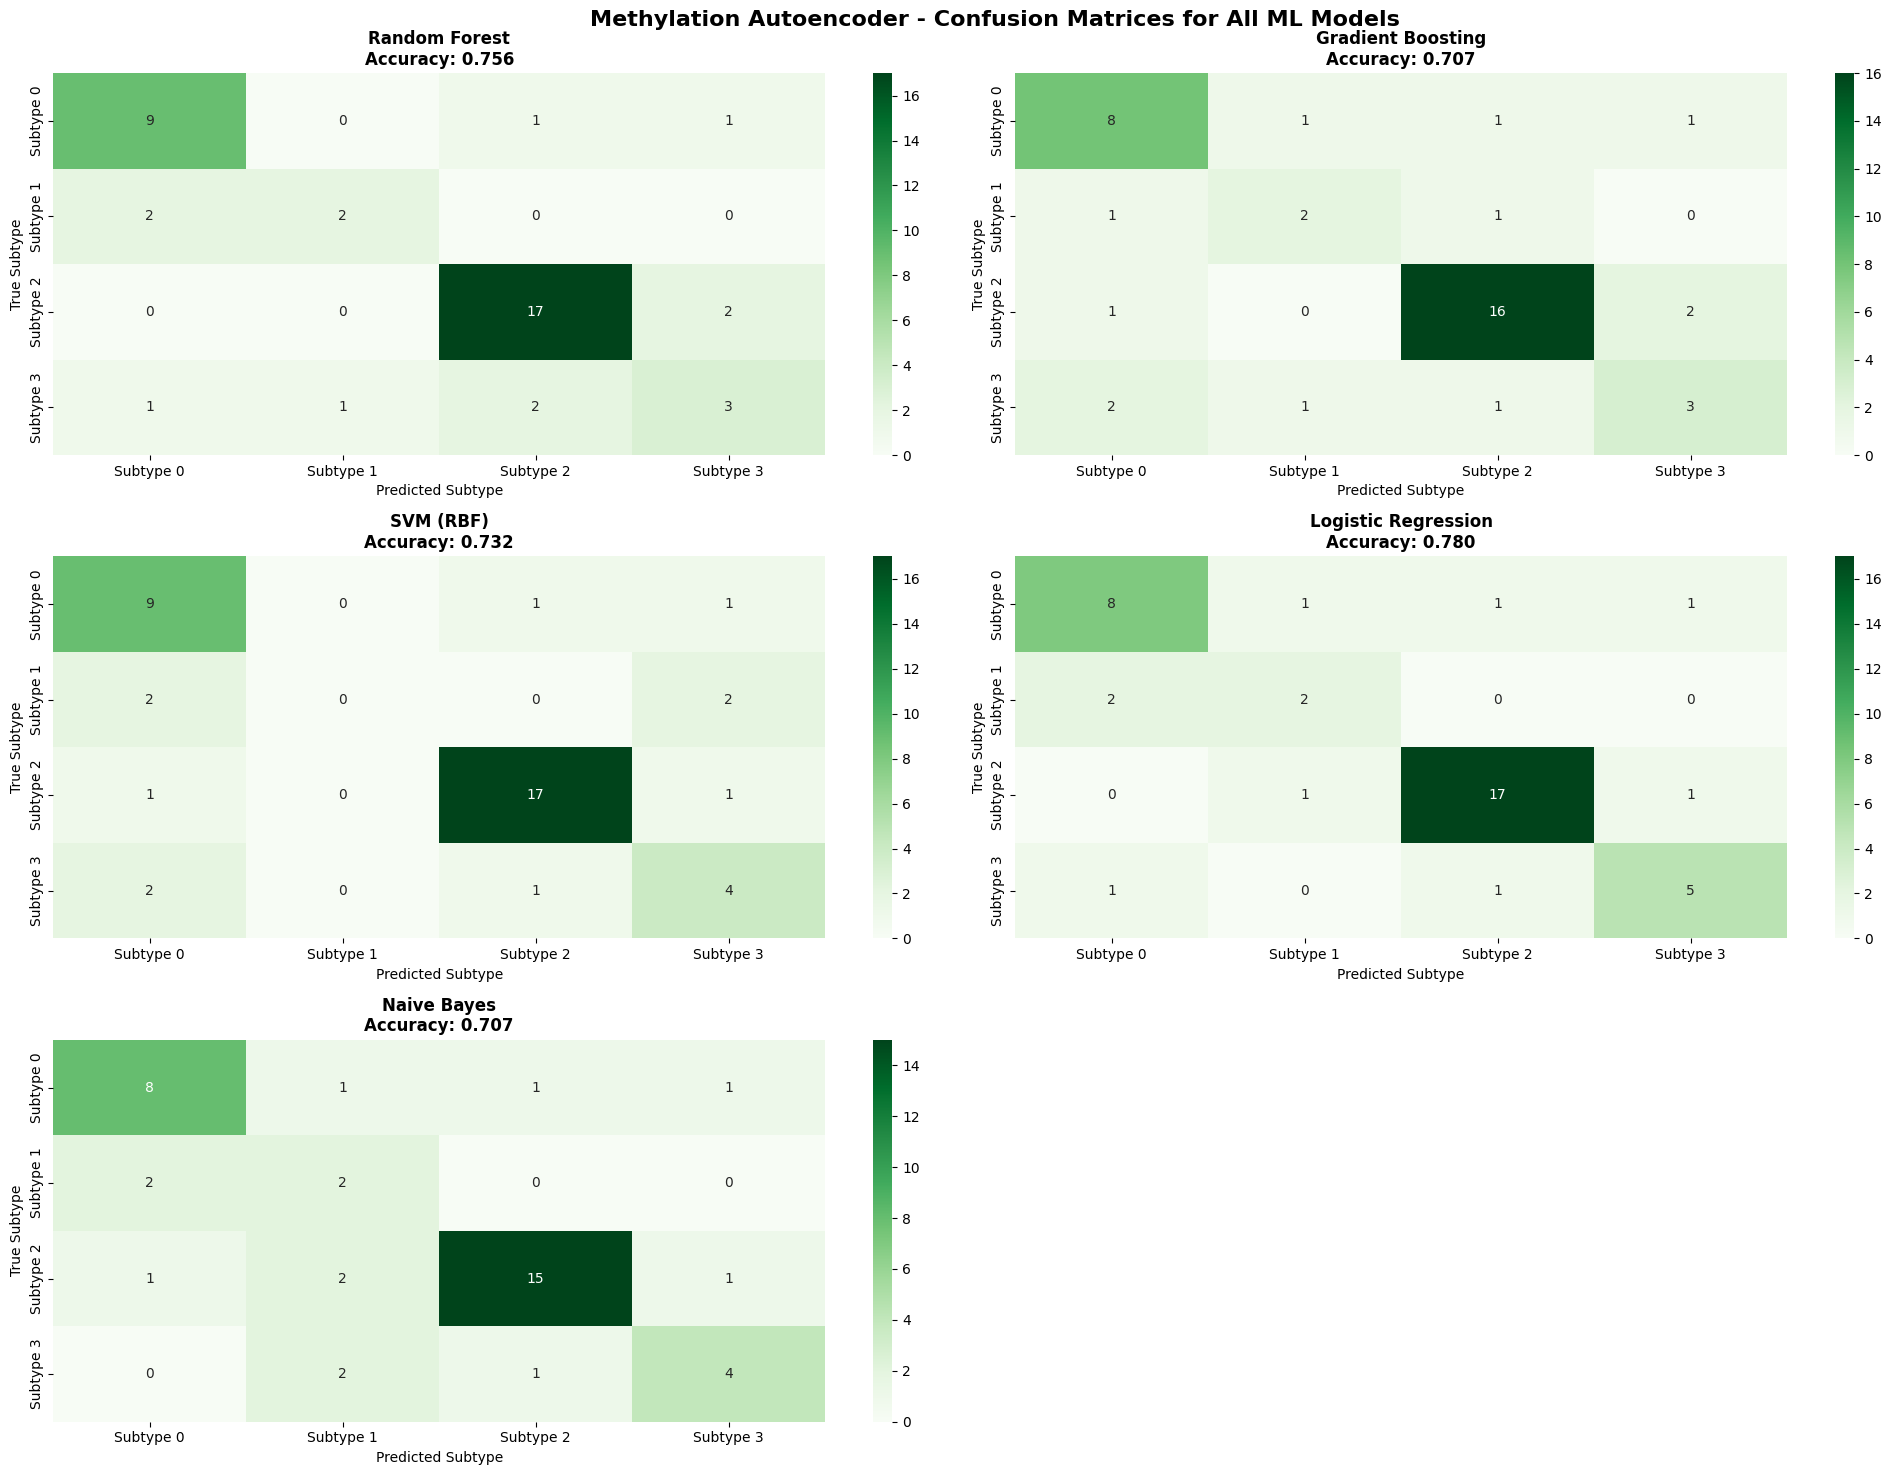


📋 DETAILED CLASSIFICATION REPORTS:

🔍 Random Forest:
----------------------------------------
              precision    recall  f1-score   support

   Subtype 0       0.75      0.82      0.78        11
   Subtype 1       0.67      0.50      0.57         4
   Subtype 2       0.85      0.89      0.87        19
   Subtype 3       0.50      0.43      0.46         7

    accuracy                           0.76        41
   macro avg       0.69      0.66      0.67        41
weighted avg       0.75      0.76      0.75        41


🔍 Gradient Boosting:
----------------------------------------
              precision    recall  f1-score   support

   Subtype 0       0.67      0.73      0.70        11
   Subtype 1       0.50      0.50      0.50         4
   Subtype 2       0.84      0.84      0.84        19
   Subtype 3       0.50      0.43      0.46         7

    accuracy                           0.71        41
   macro avg       0.63      0.62      0.62        41
weighted avg       0.70    

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrices for All ML Models on Methylation
import matplotlib.pyplot as plt

print("=" * 80)
print("🧬 METHYLATION - CONFUSION MATRICES FOR ALL ML MODELS")
print("=" * 80)

# Get the results for Methylation
omic_name = 'Methylation'
meth_result = omic_results[omic_name]

# Get train/test splits
X_train = meth_result['X_train']
X_test = meth_result['X_test']
y_train = meth_result['y_train']
y_test = meth_result['y_test']

# Get all classifiers
classifiers = meth_result['classifiers']

print(f"📊 Test set size: {len(y_test)} samples")
print(f"📊 Number of models: {len(classifiers)}")

# Create subplots for all models
n_models = len(classifiers)
n_cols = 2  # Adjust based on number of models
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Methylation Autoencoder - Confusion Matrices for All ML Models', fontsize=16, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

for idx, (name, clf) in enumerate(classifiers.items()):
    # Train and predict
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[idx],
                xticklabels=[f'Subtype {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Subtype {i}' for i in range(cm.shape[0])])
    axes[idx].set_title(f'{name}\nAccuracy: {clf.score(X_test, y_test):.3f}', fontweight='bold')
    axes[idx].set_xlabel('Predicted Subtype')
    axes[idx].set_ylabel('True Subtype')

# Hide unused subplots
for idx in range(n_models, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Print detailed classification reports for all models
print("\n📋 DETAILED CLASSIFICATION REPORTS:")
print("=" * 80)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"\n🔍 {name}:")
    print("-" * 40)
    print(classification_report(y_test, y_pred, 
                                target_names=[f'Subtype {i}' for i in sorted(set(y_test))]))

print("✅ All ML models confusion matrices and reports completed!")


🧬 COPY NUMBER VARIATION - CONFUSION MATRICES FOR ALL ML MODELS
📊 Test set size: 41 samples
📊 Number of models: 5


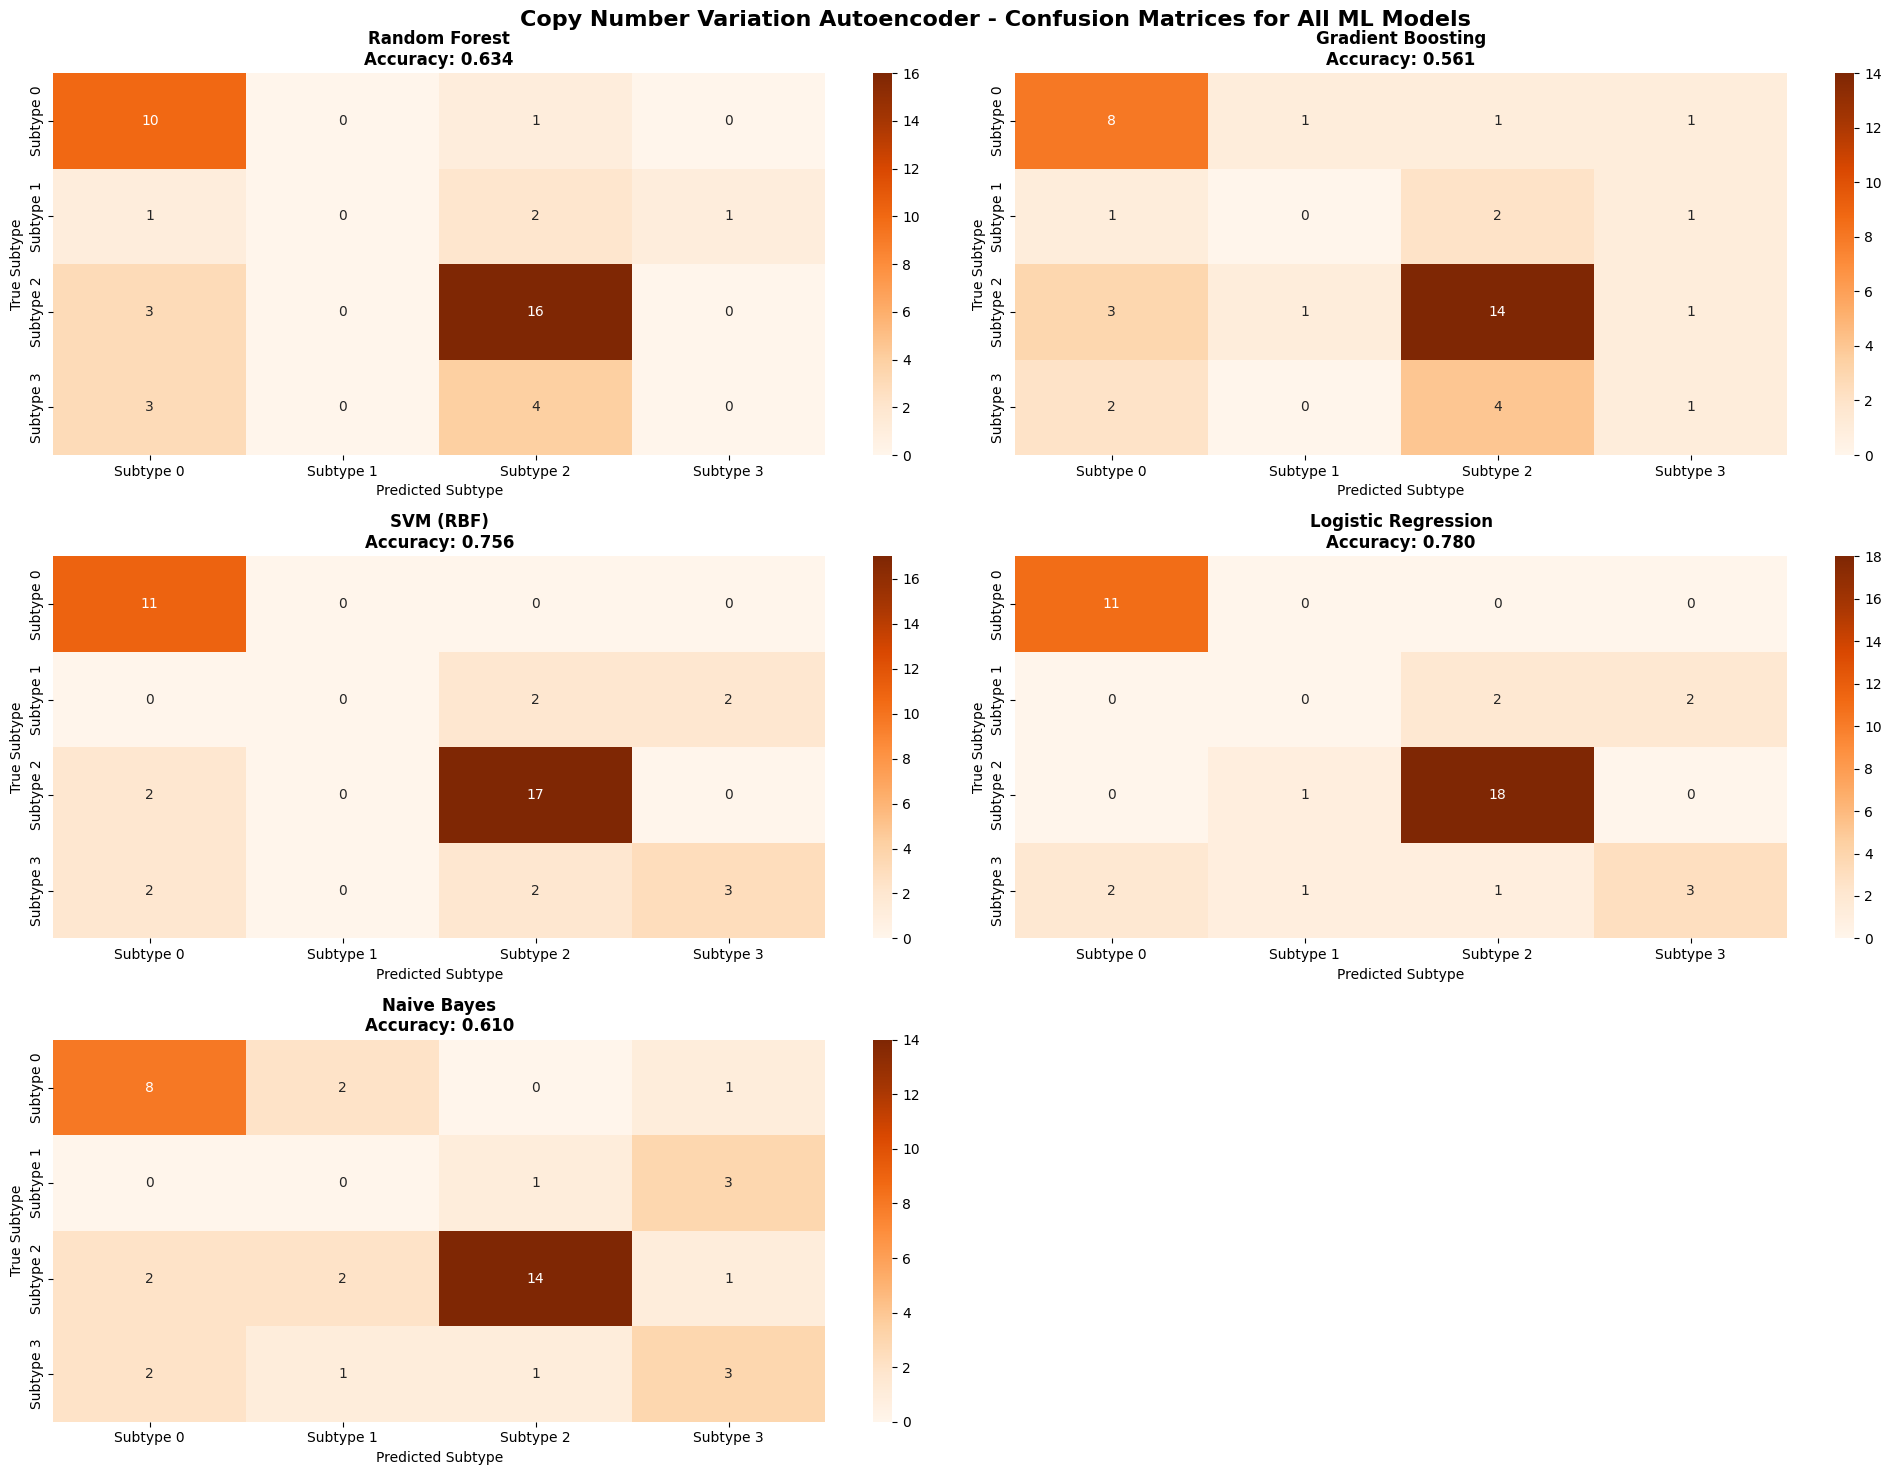


📋 DETAILED CLASSIFICATION REPORTS:

🔍 Random Forest:
----------------------------------------
              precision    recall  f1-score   support

   Subtype 0       0.59      0.91      0.71        11
   Subtype 1       0.00      0.00      0.00         4
   Subtype 2       0.70      0.84      0.76        19
   Subtype 3       0.00      0.00      0.00         7

    accuracy                           0.63        41
   macro avg       0.32      0.44      0.37        41
weighted avg       0.48      0.63      0.54        41


🔍 Gradient Boosting:
----------------------------------------
              precision    recall  f1-score   support

   Subtype 0       0.57      0.73      0.64        11
   Subtype 1       0.00      0.00      0.00         4
   Subtype 2       0.67      0.74      0.70        19
   Subtype 3       0.25      0.14      0.18         7

    accuracy                           0.56        41
   macro avg       0.37      0.40      0.38        41
weighted avg       0.50    

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrices for All ML Models on Copy Number Variation
import matplotlib.pyplot as plt

print("=" * 80)
print("🧬 COPY NUMBER VARIATION - CONFUSION MATRICES FOR ALL ML MODELS")
print("=" * 80)

# Get the results for Copy Number Variation
omic_name = 'Copy Number Variation'
cnv_result = omic_results[omic_name]

# Get train/test splits
X_train = cnv_result['X_train']
X_test = cnv_result['X_test']
y_train = cnv_result['y_train']
y_test = cnv_result['y_test']

# Get all classifiers
classifiers = cnv_result['classifiers']

print(f"📊 Test set size: {len(y_test)} samples")
print(f"📊 Number of models: {len(classifiers)}")

# Create subplots for all models
n_models = len(classifiers)
n_cols = 2  # Adjust based on number of models
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Copy Number Variation Autoencoder - Confusion Matrices for All ML Models', fontsize=16, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

for idx, (name, clf) in enumerate(classifiers.items()):
    # Train and predict
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[idx],
                xticklabels=[f'Subtype {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Subtype {i}' for i in range(cm.shape[0])])
    axes[idx].set_title(f'{name}\nAccuracy: {clf.score(X_test, y_test):.3f}', fontweight='bold')
    axes[idx].set_xlabel('Predicted Subtype')
    axes[idx].set_ylabel('True Subtype')

# Hide unused subplots
for idx in range(n_models, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Print detailed classification reports for all models
print("\n📋 DETAILED CLASSIFICATION REPORTS:")
print("=" * 80)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"\n🔍 {name}:")
    print("-" * 40)
    print(classification_report(y_test, y_pred, 
                                target_names=[f'Subtype {i}' for i in sorted(set(y_test))]))

print("✅ All ML models confusion matrices and reports completed!")
